In [1]:
install.packages(c("FactoMineR", "factoextra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘corrplot’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘reshape2’




In [2]:
library("FactoMineR")
library("factoextra")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
data(decathlon2)
# head(decathlon2)

In [4]:
decathlon2.active <- decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6], 4)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69
CLAY,10.76,7.40,14.26,1.86,49.37,14.05
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31


In [5]:
PCA(X, scale.unit = TRUE, ncp = 5, graph = TRUE)


ERROR: Error: object 'X' not found


In [6]:
library("FactoMineR")
res.pca <- PCA(decathlon2.active, graph = FALSE)

In [7]:
print(res.pca)


**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [8]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029
Dim.10,0.1219710,1.219710,100.00000


Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


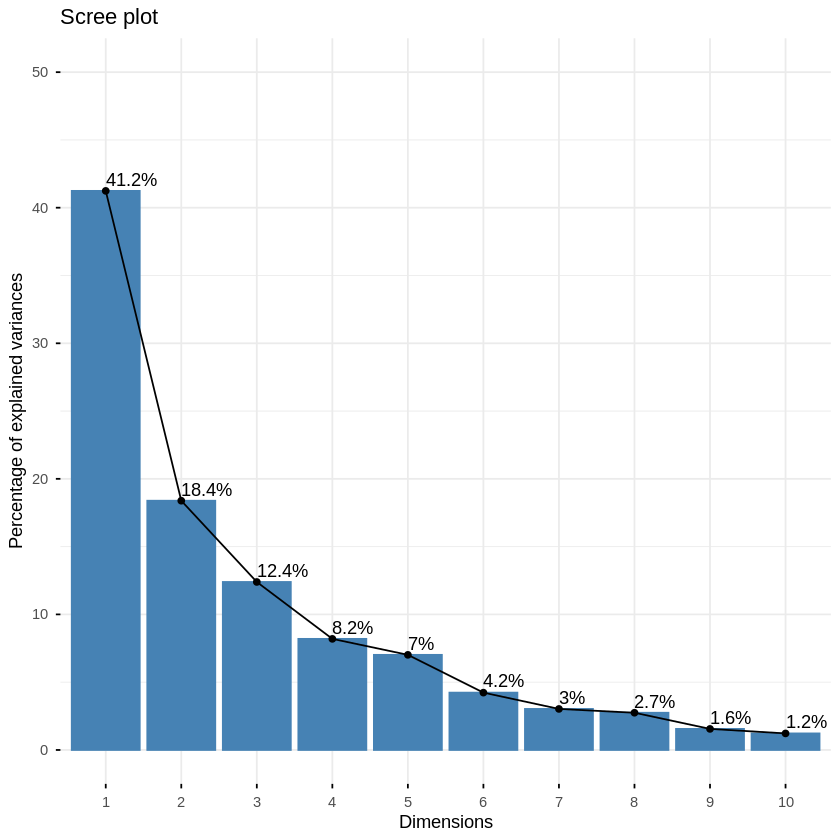

In [9]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))


In [10]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [11]:
# Coordinates
head(var$coord)
# Cos2: quality on the factore map
head(var$cos2)
# Contributions to the principal components
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.03357320,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.11538956,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.12846837,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.14455012,0.4027002
X400m,-0.7016034,0.29017826,0.2835329,0.43082552,0.1039085
X110m.hurdle,-0.7641252,-0.02474081,0.4488873,-0.01689589,0.2242200


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.0321836641,0.09093628,0.0011271597,0.03780845
Long.jump,0.6307229,0.0788806285,0.03630798,0.0133147506,0.05436203
Shot.put,0.5386279,0.0072938636,0.26790749,0.0165041211,0.06190783
High.jump,0.3722025,0.2164242070,0.10895622,0.0208947375,0.16216747
X400m,0.4922473,0.0842034209,0.08039091,0.1856106269,0.01079698
X110m.hurdle,0.5838873,0.0006121077,0.20149984,0.0002854712,0.05027463


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.13755240,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.62485936,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.01407269,8.824401
High.jump,9.024811,11.7715838,8.792888,2.54987951,23.115504
X400m,11.935544,4.5799296,6.487636,22.65090599,1.539012
X110m.hurdle,14.157544,0.0332933,16.261261,0.03483735,7.166193


In [12]:
# Coordinates of variables
head(var$coord, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.0335732,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.1153896,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.1284684,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.1445501,0.4027002


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


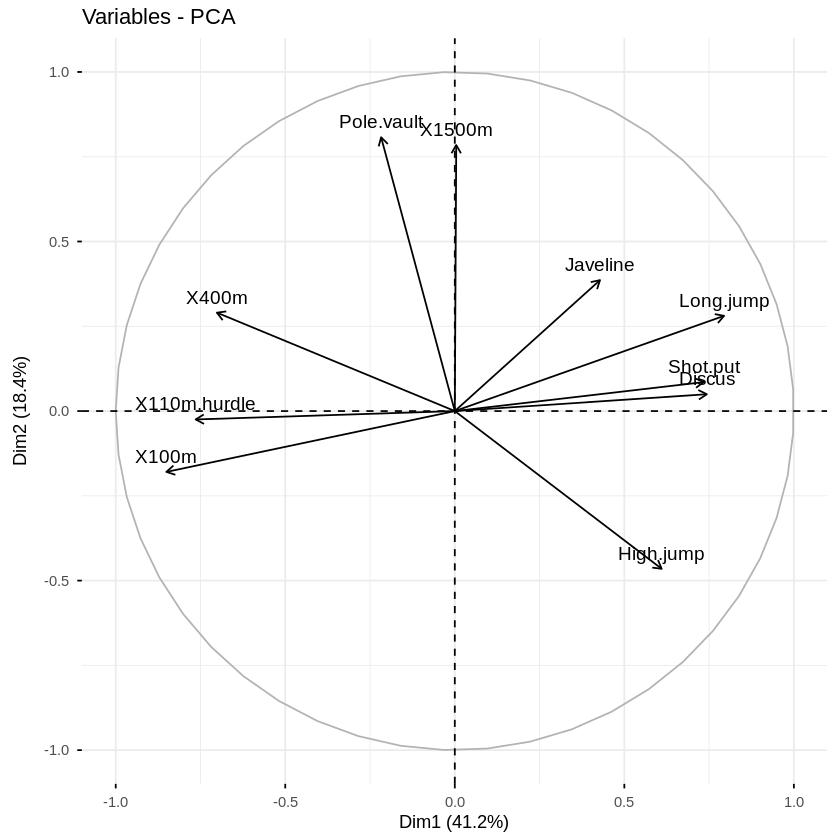

In [13]:
fviz_pca_var(res.pca, col.var = "black")


In [14]:
head(var$cos2, 4)


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.032183664,0.09093628,0.00112716,0.03780845
Long.jump,0.6307229,0.078880629,0.03630798,0.01331475,0.05436203
Shot.put,0.5386279,0.007293864,0.26790749,0.01650412,0.06190783
High.jump,0.3722025,0.216424207,0.10895622,0.02089474,0.16216747


corrplot 0.95 loaded



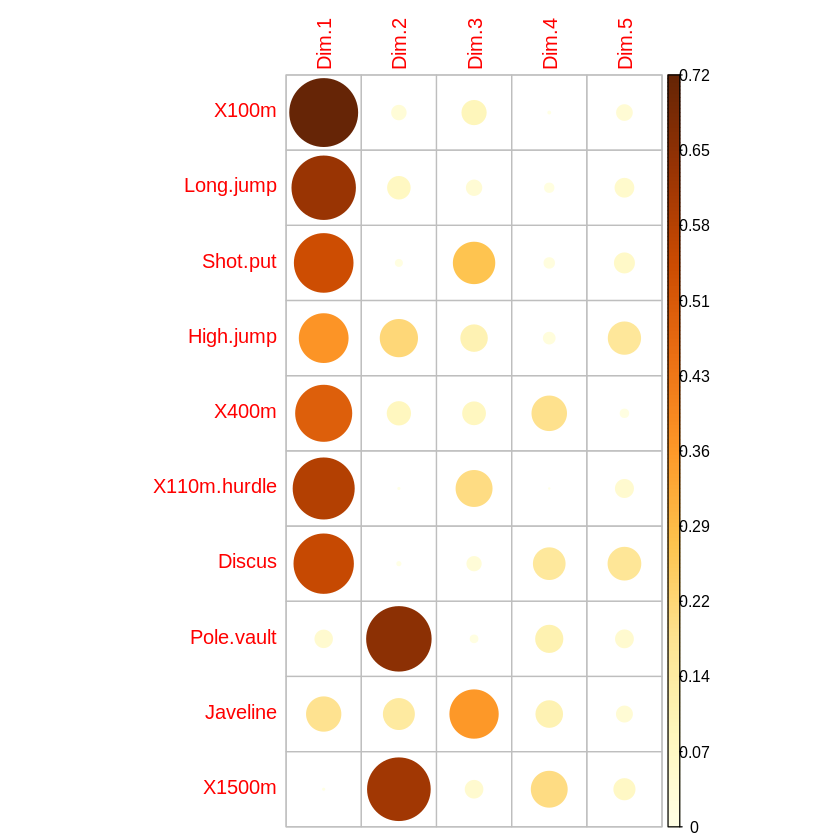

In [15]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

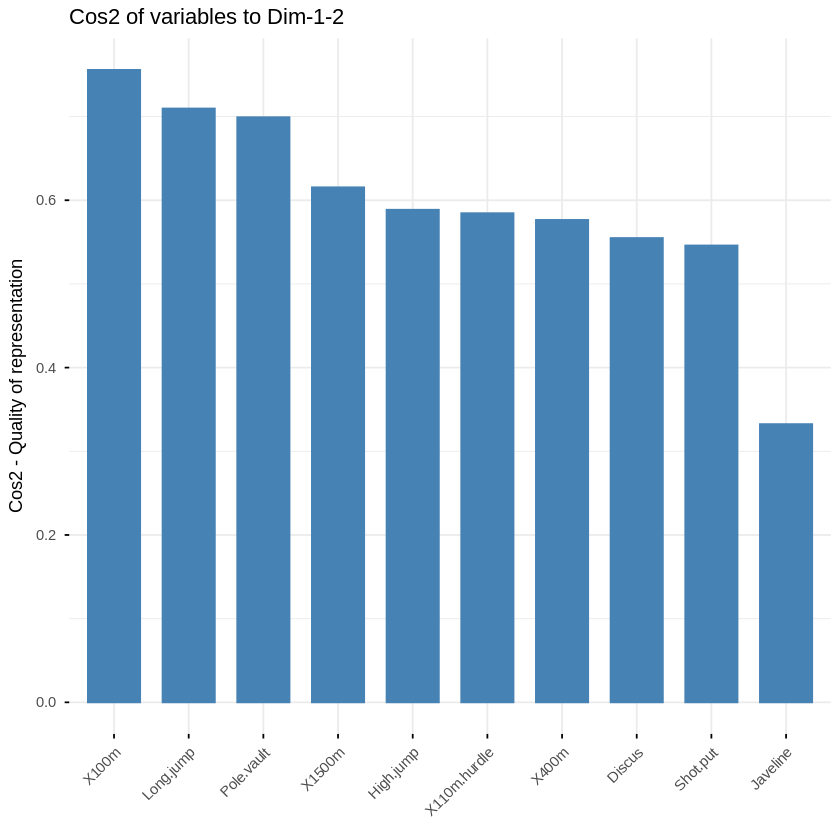

In [16]:
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2)

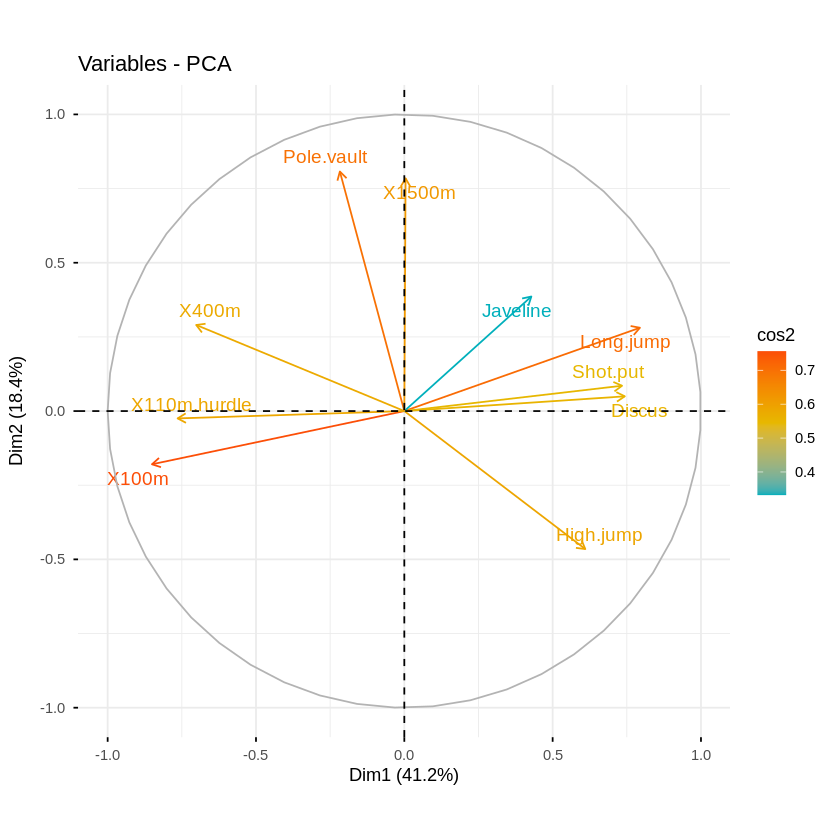

In [17]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
             )

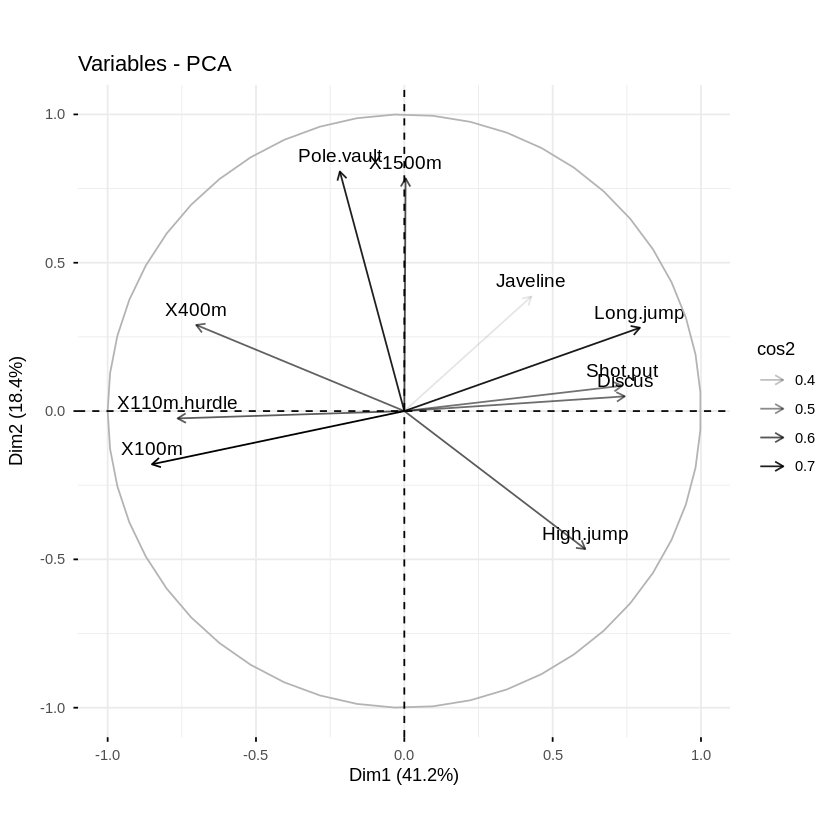

In [18]:
# Change the transparency by cos2 values
fviz_pca_var(res.pca, alpha.var = "cos2")

In [19]:
head(var$contrib, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.1375524,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.6248594,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.0140727,8.824401
High.jump,9.024811,11.7715838,8.792888,2.5498795,23.115504


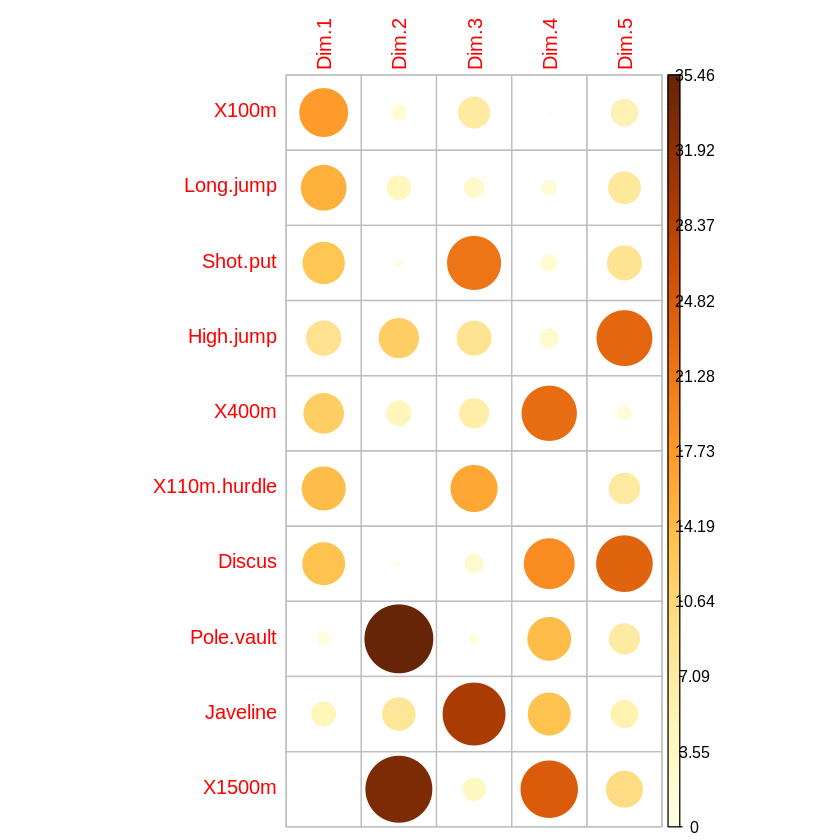

In [20]:
library("corrplot")
corrplot(var$contrib, is.corr=FALSE)

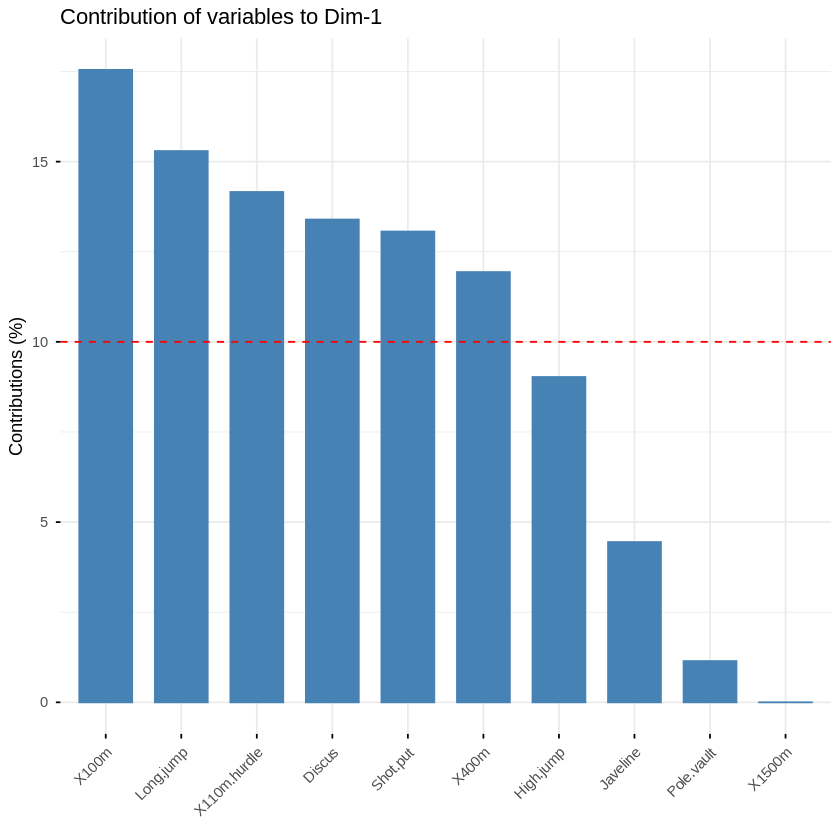

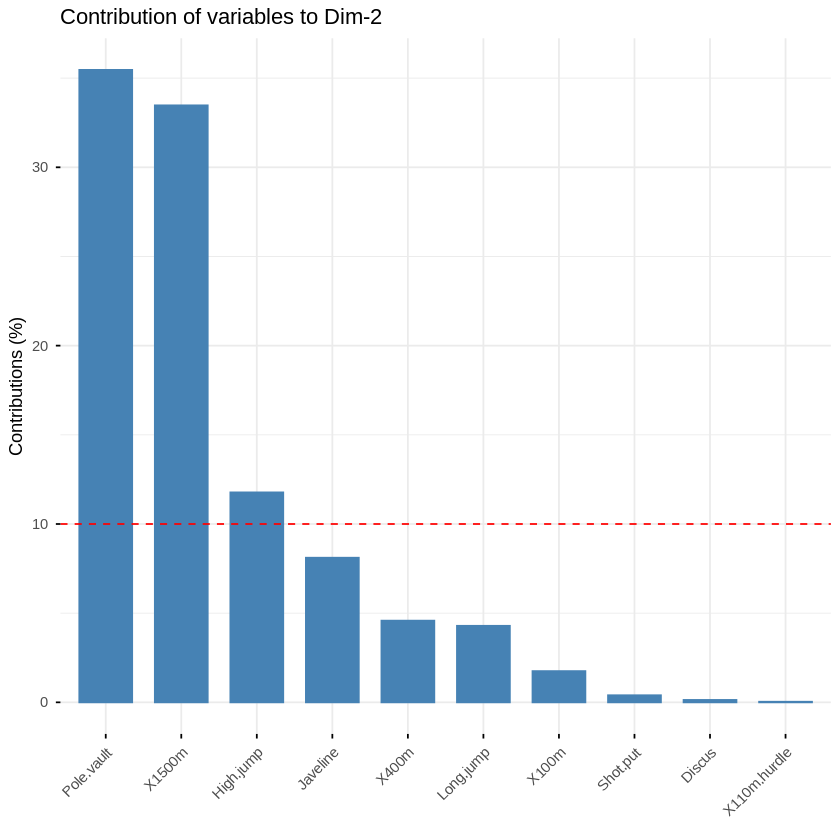

In [21]:
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

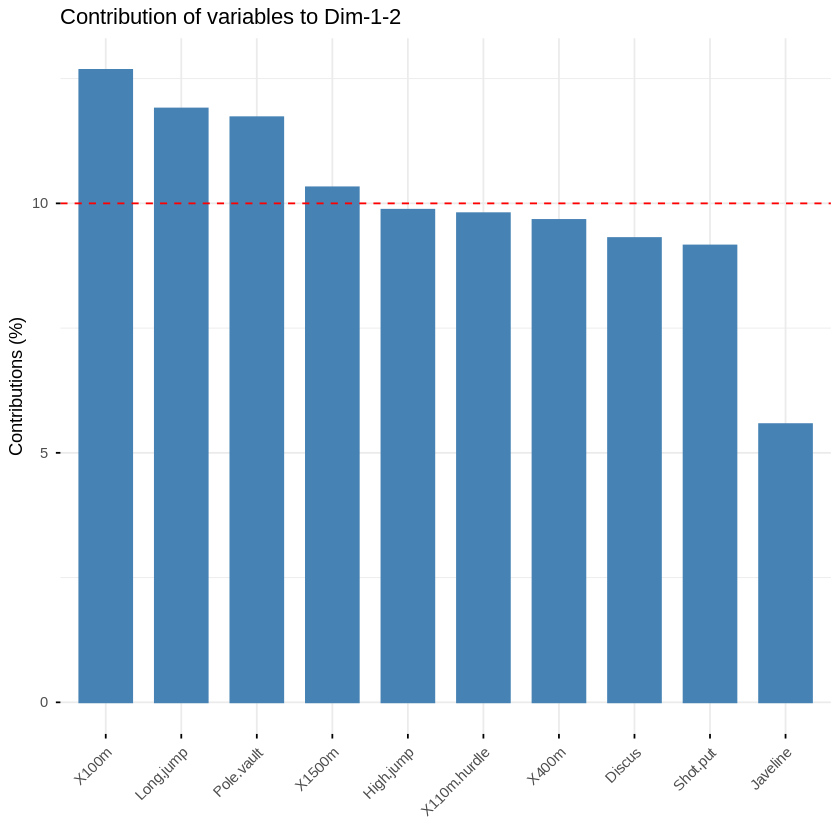

In [22]:
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)

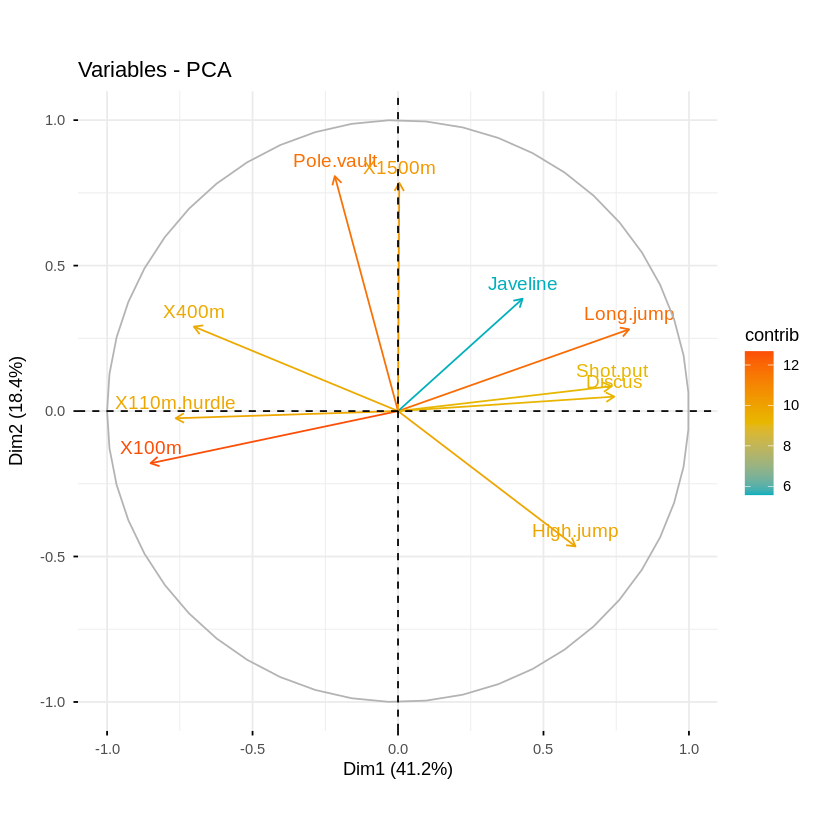

In [23]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

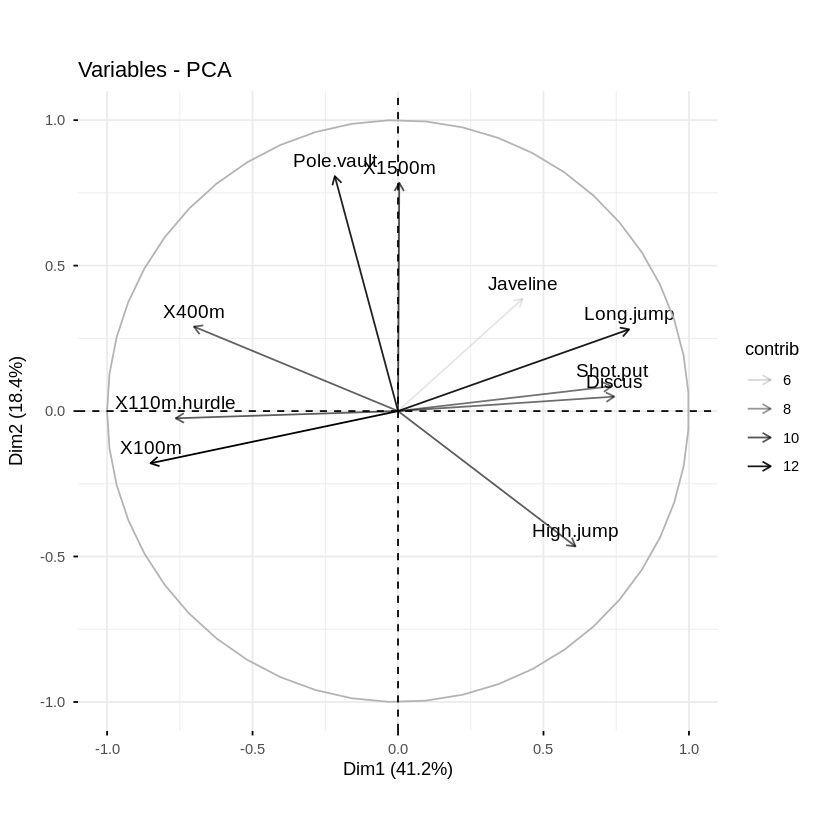

In [24]:
# Change the transparency by contrib values
fviz_pca_var(res.pca, alpha.var = "contrib")

Ignoring unknown labels:
• fill : "Cont.Var"
• linetype : "Cont.Var"
• shape : "Cont.Var"


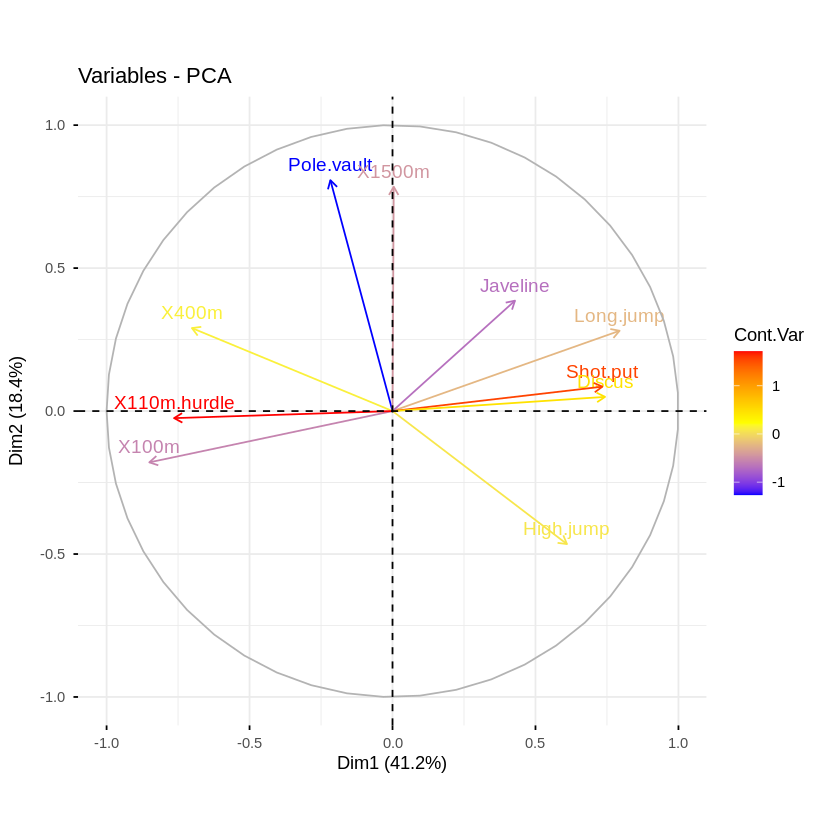

In [25]:
# Create a random continuous variable of length 10
set.seed(123)
my.cont.var <- rnorm(10)
# Color variables by the continuous variable
fviz_pca_var(res.pca, col.var = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

Ignoring unknown labels:
• fill : "Cluster"
• linetype : "Cluster"
• shape : "Cluster"


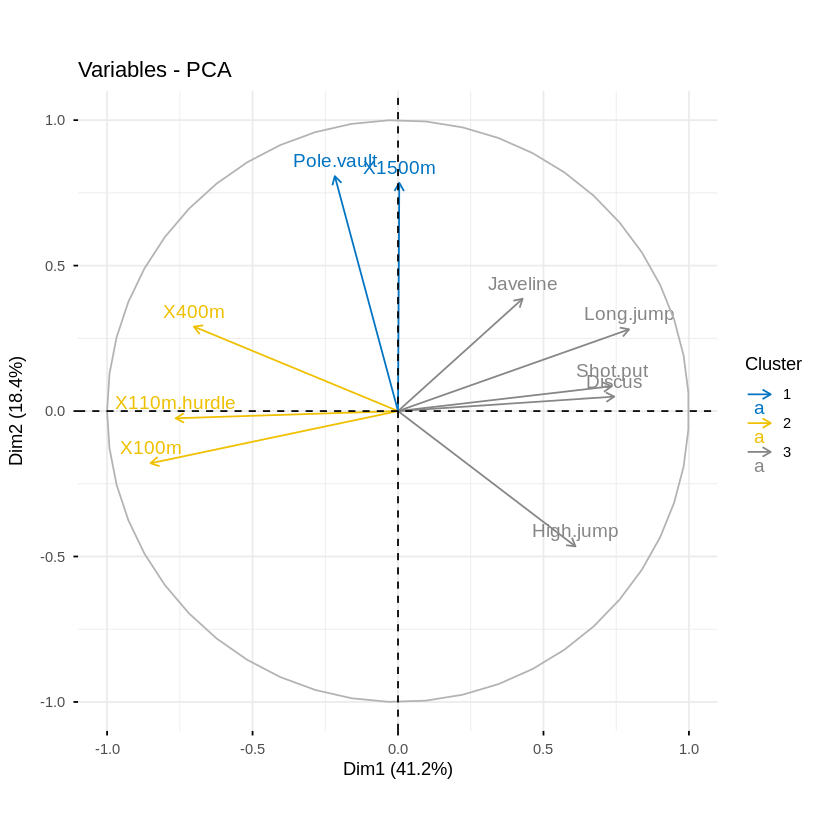

In [26]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp,
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

In [27]:
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1

,correlation,p.value
Long.jump,0.7941806,6.059893e-06
Discus,0.7432090,4.842563e-05
Shot.put,0.7339127,6.723102e-05
High.jump,0.6100840,1.993677e-03
Javeline,0.4282266,4.149192e-02
X400m,-0.7016034,1.910387e-04
X110m.hurdle,-0.7641252,2.195812e-05
X100m,-0.8506257,2.727129e-07


In [28]:
# Description of dimension 2
res.desc$Dim.2

,correlation,p.value
Pole.vault,0.8074511,3.205016e-06
X1500m,0.7844802,9.384747e-06
High.jump,-0.4652142,2.529390e-02


In [29]:
ind <- get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [30]:
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.1955047,1.5890567,0.6424912,0.08389652,1.16829387
CLAY,0.8078795,2.4748137,-1.3873827,1.29838232,-0.82498206
BERNARD,-1.3591340,1.6480950,0.2005584,-1.96409420,0.08419345
YURKOV,-0.8889532,-0.4426067,2.5295843,0.71290837,0.40782264
ZSIVOCZKY,-0.1081216,-2.0688377,-1.3342591,-0.10152796,-0.20145217
McMULLEN,0.1212195,-1.0139102,-0.8625170,1.34164291,1.62151286


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.007530179,0.49747323,0.081325232,0.001386688,0.2689026575
CLAY,0.048701249,0.45701660,0.143628117,0.125791741,0.0507850580
BERNARD,0.197199804,0.28996555,0.004294015,0.411819183,0.0007567259
YURKOV,0.096109800,0.02382571,0.778230322,0.061812637,0.0202279796
ZSIVOCZKY,0.001574385,0.57641944,0.239754152,0.001388216,0.0054654972
McMULLEN,0.002175437,0.15219499,0.110137872,0.266486530,0.3892621478


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.04029447,5.9714533,1.4483919,0.03734589,8.45894063
CLAY,0.68805664,14.4839248,6.7537381,8.94458283,4.21794385
BERNARD,1.94740183,6.4234107,0.1411345,20.46819433,0.04393073
YURKOV,0.83308415,0.4632733,22.4517396,2.69663605,1.03075263
ZSIVOCZKY,0.01232413,10.1217143,6.2464325,0.05469230,0.25151025
McMULLEN,0.01549089,2.4310854,2.6102794,9.55055888,16.29493304


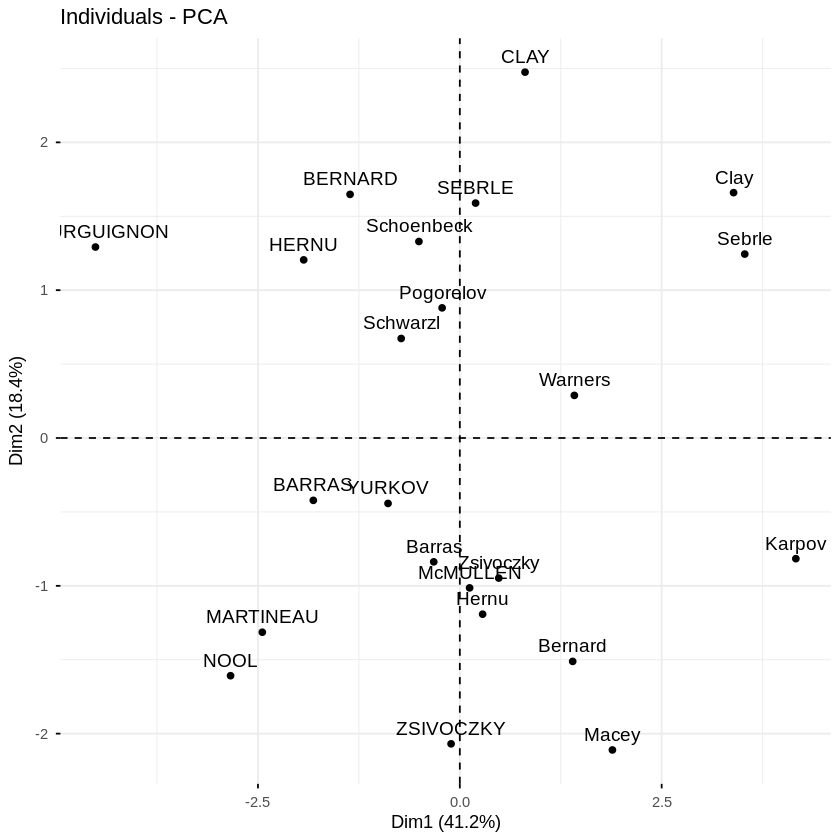

In [31]:
fviz_pca_ind(res.pca)


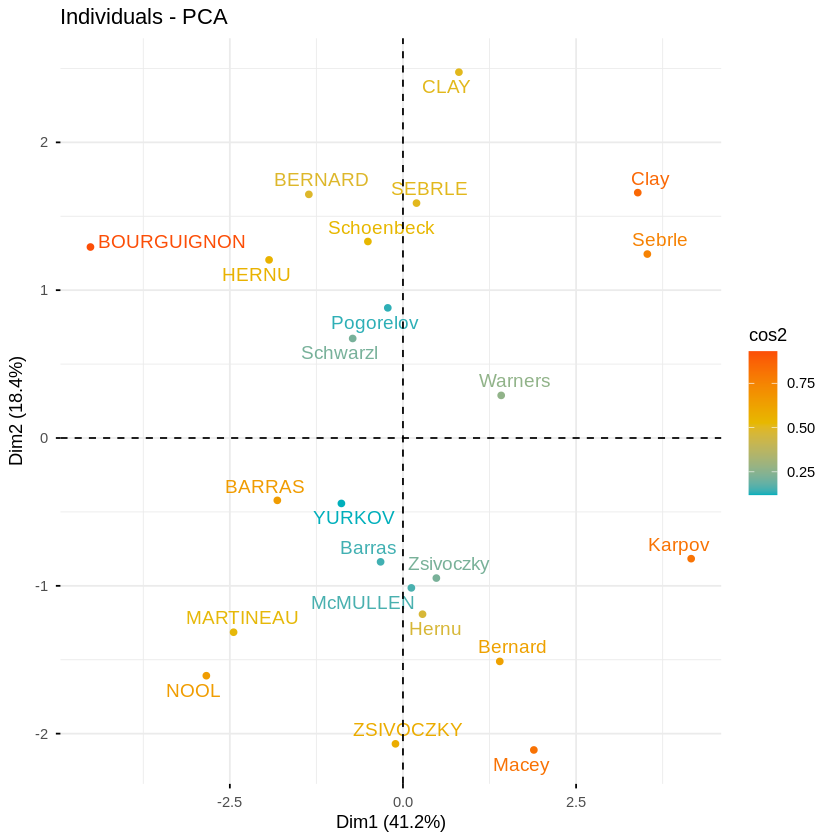

In [32]:
fviz_pca_ind(res.pca, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

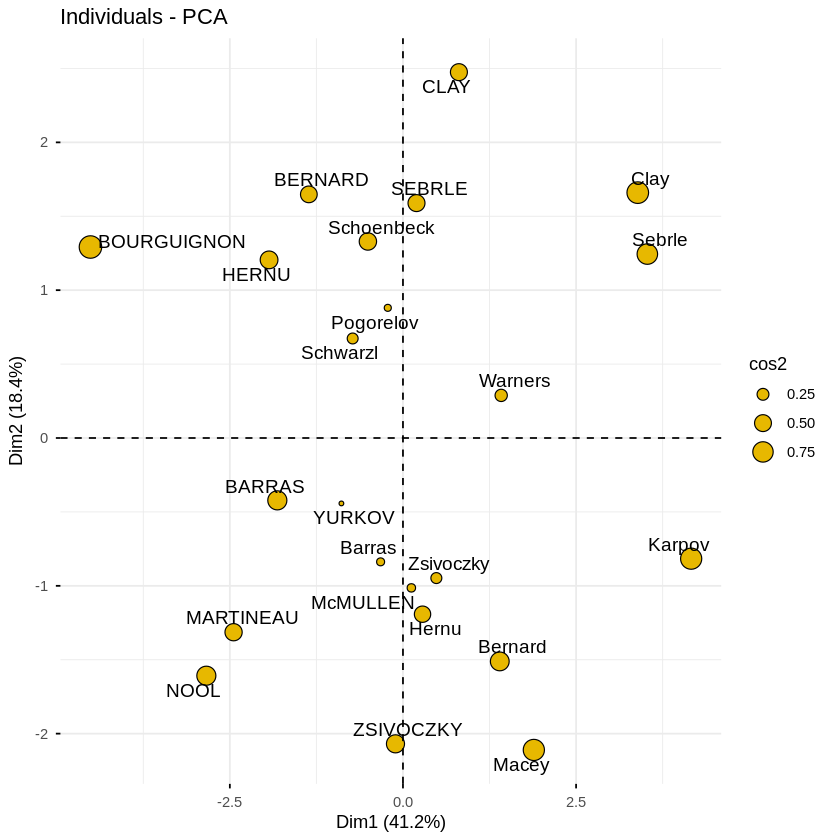

In [33]:
fviz_pca_ind(res.pca, pointsize = "cos2",
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

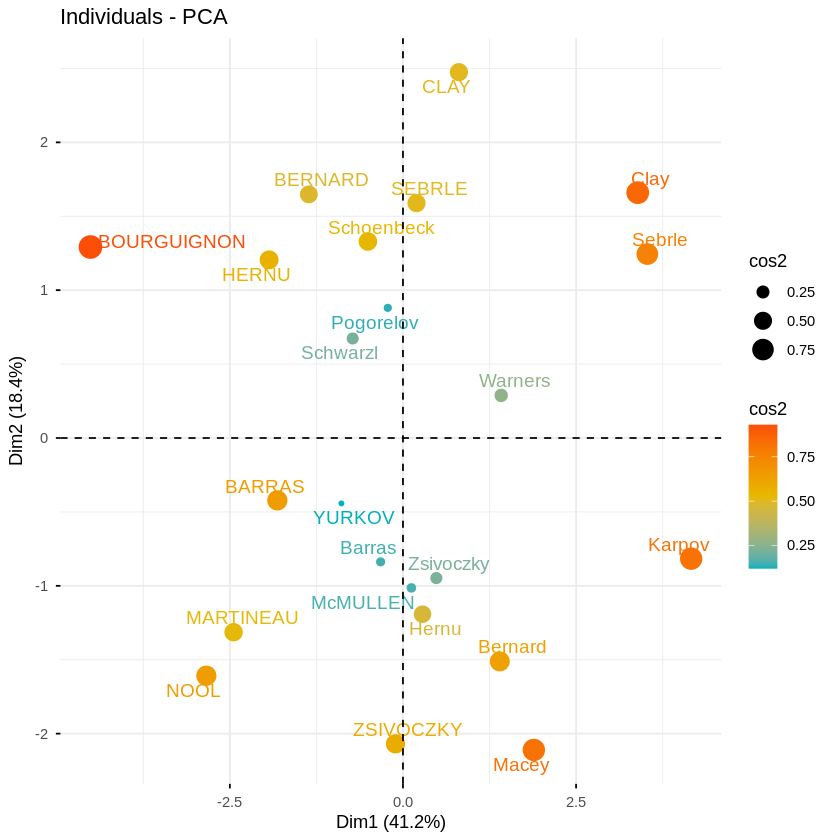

In [34]:
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

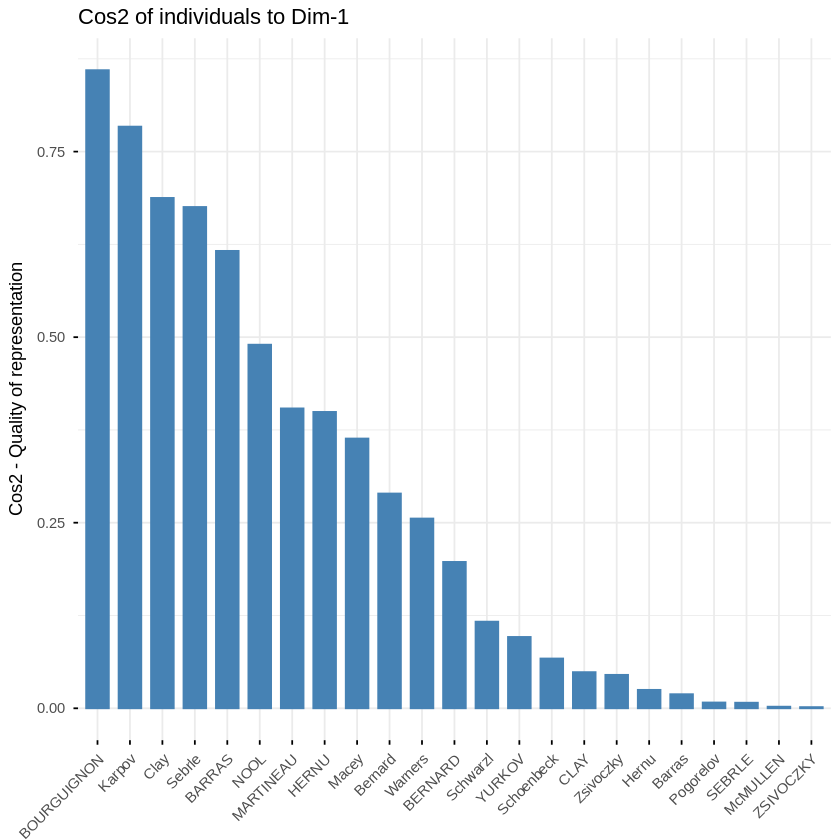

In [35]:
fviz_cos2(res.pca, choice = "ind")


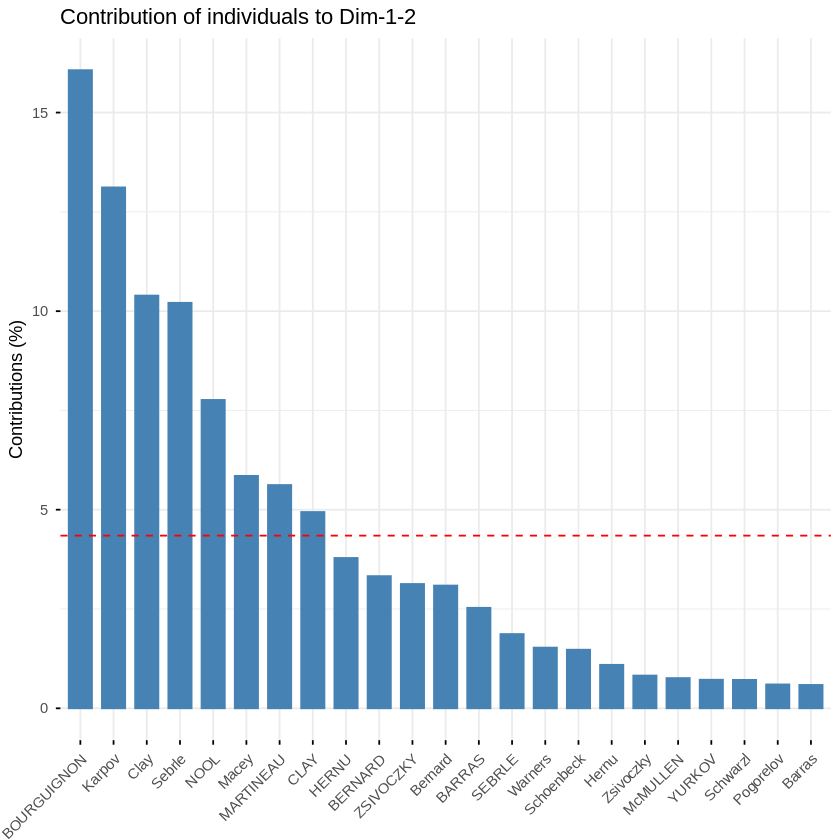

In [36]:
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2)

Ignoring unknown labels:
• fill : "Cont.Var"
• linetype : "Cont.Var"
• shape : "Cont.Var"


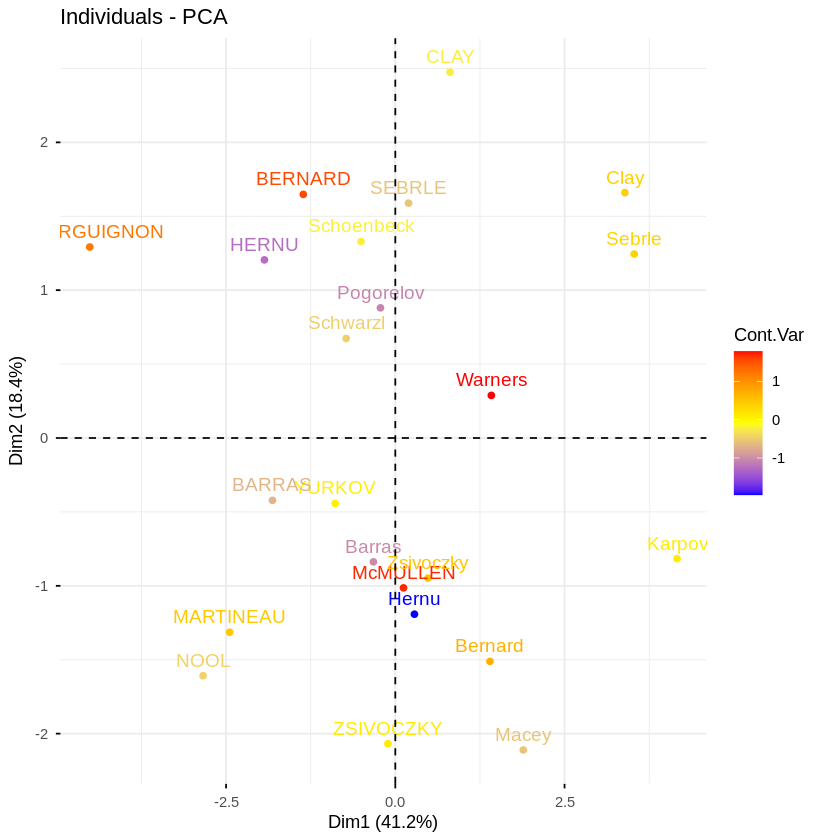

In [37]:
# Create a random continuous variable of length 23,
# Same length as the number of active individuals in the PCA
set.seed(123)
my.cont.var <- rnorm(23)
# Color individuals by the continuous variable
fviz_pca_ind(res.pca, col.ind = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

In [38]:
head(iris, 3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [39]:
# The variable Species (index = 5) is removed
# before PCA analysis
iris.pca <- PCA(iris[,-5], graph = FALSE)

Ignoring unknown labels:
• linetype : "Groups"


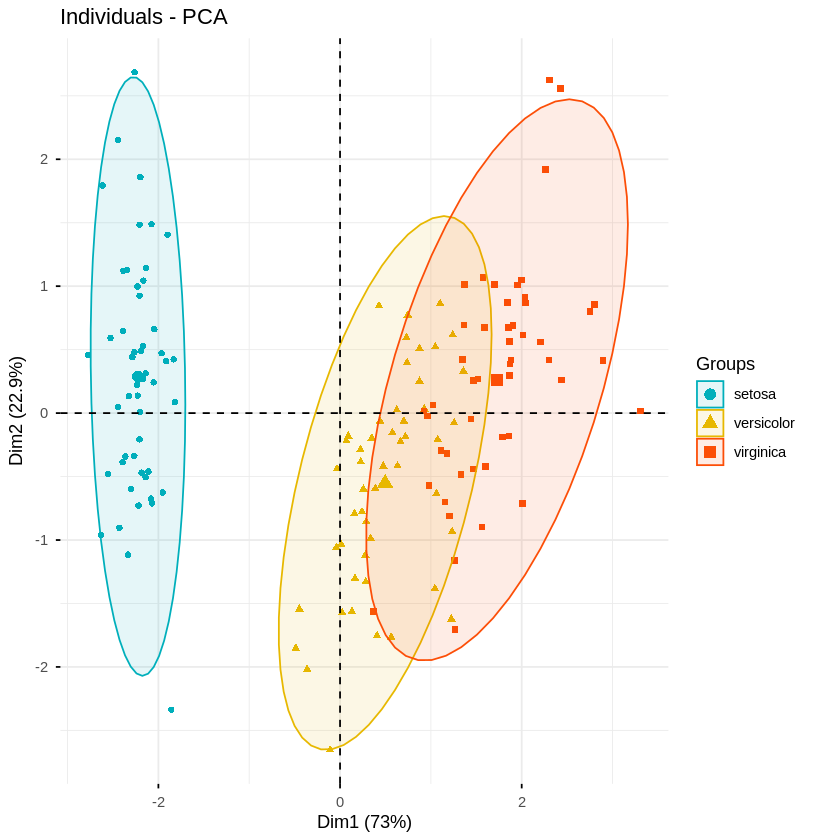

In [40]:
fviz_pca_ind(iris.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

Ignoring unknown labels:
• linetype : "Groups"


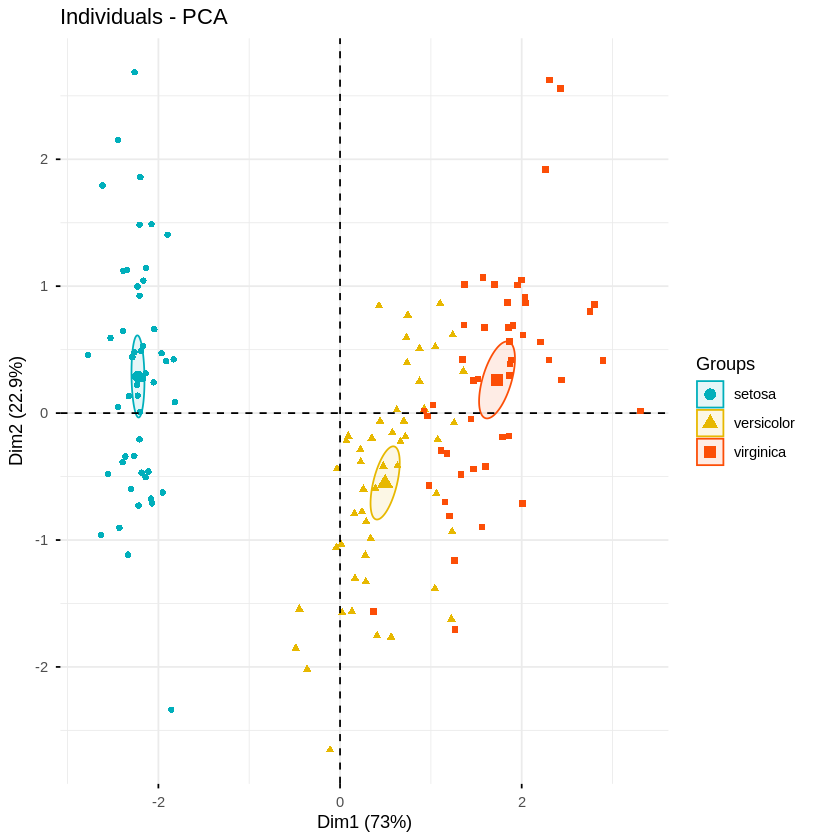

In [41]:
# Add confidence ellipses
fviz_pca_ind(iris.pca, geom.ind = "point", col.ind = iris$Species,
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )

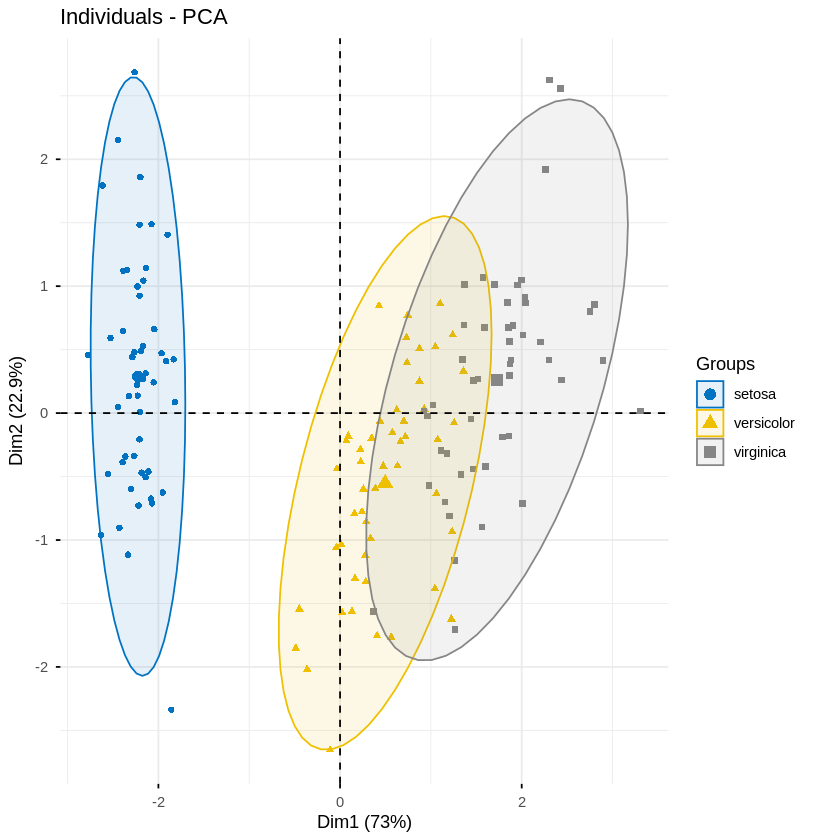

In [42]:
fviz_pca_ind(iris.pca,
             label = "none", # hide individual labels
             habillage = iris$Species, # color by groups
             addEllipses = TRUE, # Concentration ellipses
             palette = "jco"
             )

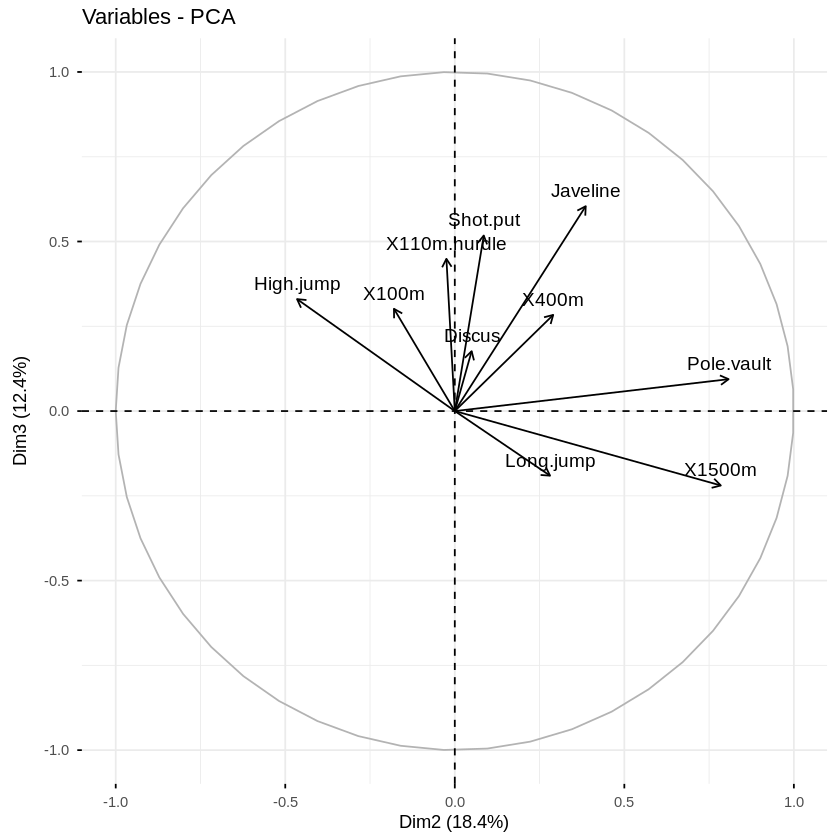

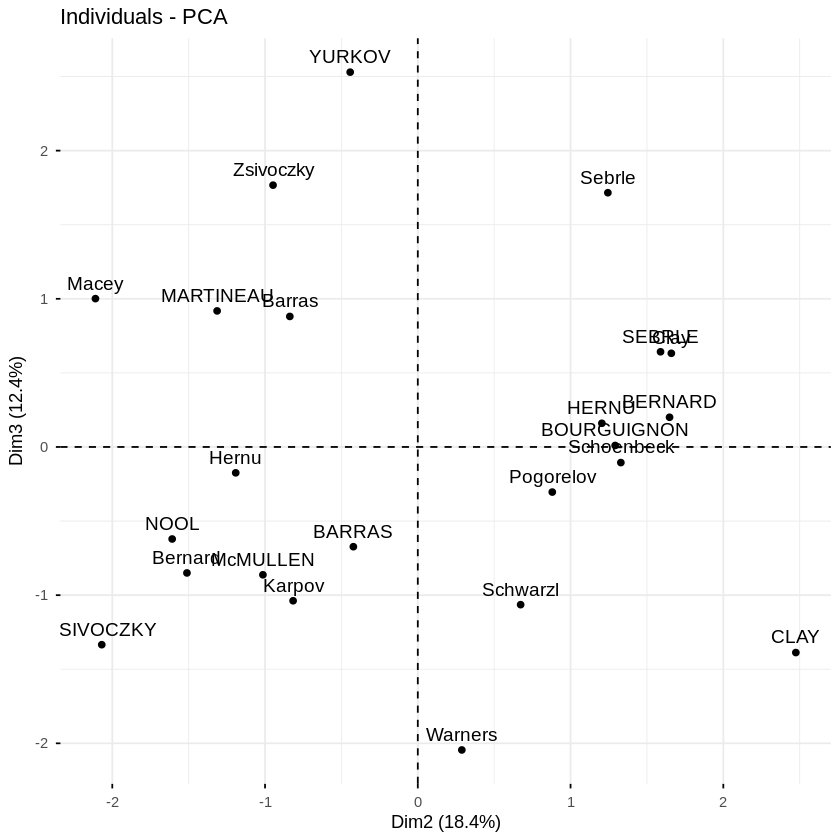

In [43]:
# Variables on dimensions 2 and 3
fviz_pca_var(res.pca, axes = c(2, 3))
# Individuals on dimensions 2 and 3
fviz_pca_ind(res.pca, axes = c(2, 3))

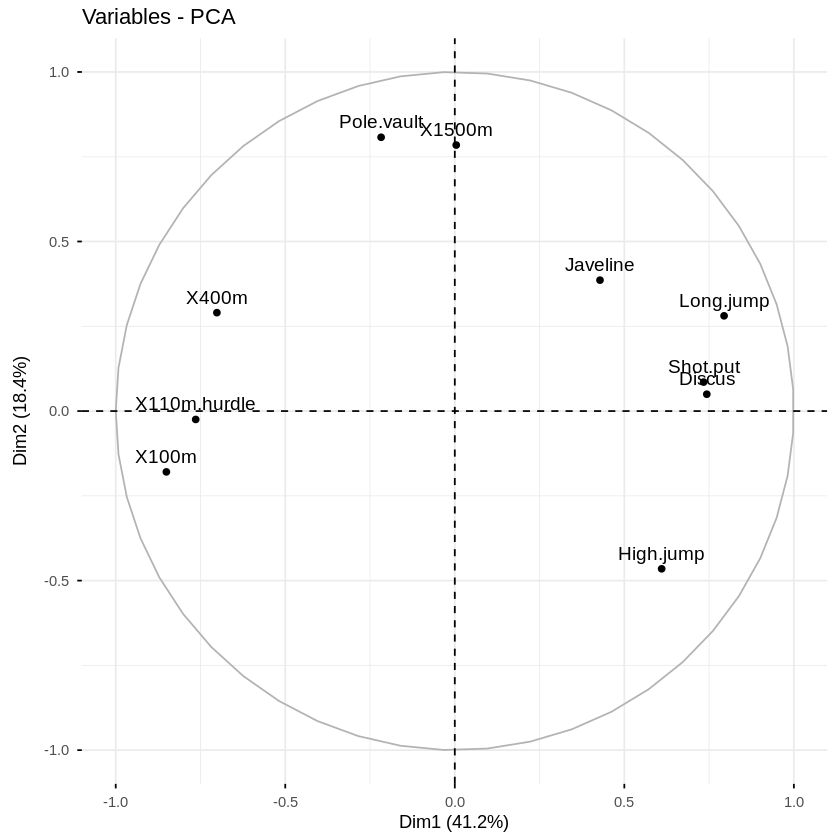

In [44]:
# Show variable points and text labels
fviz_pca_var(res.pca, geom.var = c("point", "text"))

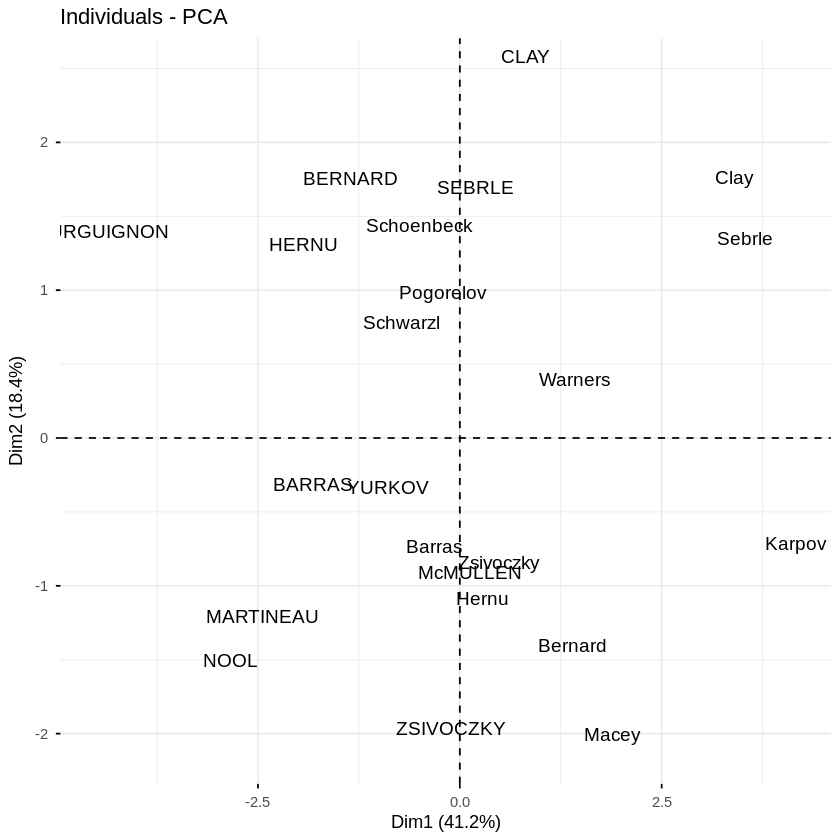

In [45]:
# Show individuals text labels only
fviz_pca_ind(res.pca, geom.ind =  "text")

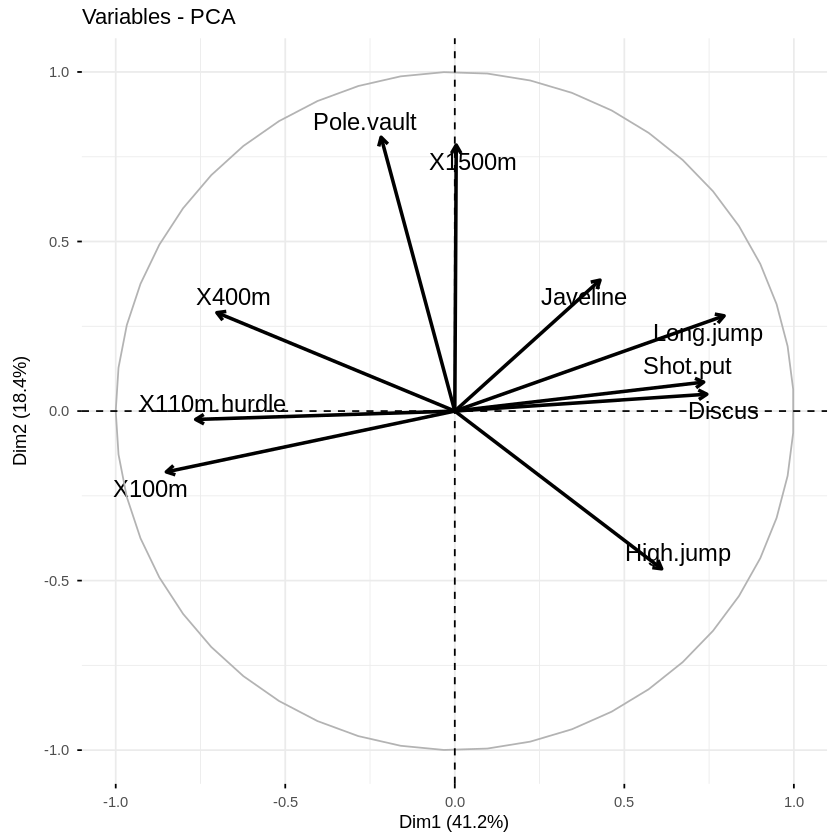

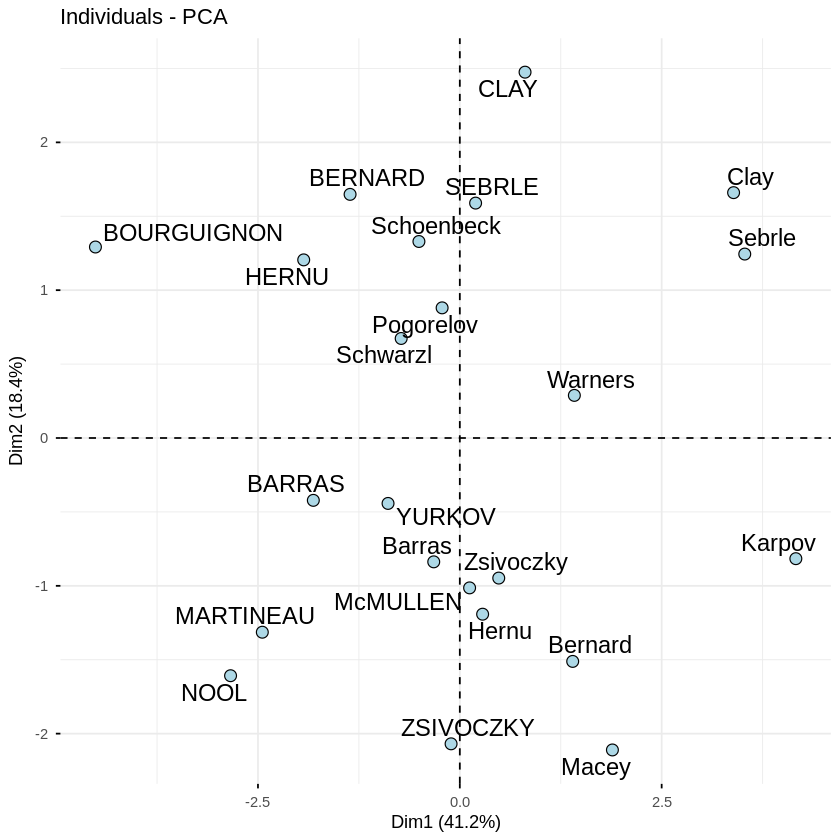

In [46]:
# Change the size of arrows an labels
fviz_pca_var(res.pca, arrowsize = 1, labelsize = 5,
             repel = TRUE)
# Change points size, shape and fill color
# Change labelsize
fviz_pca_ind(res.pca,
             pointsize = 3, pointshape = 21, fill = "lightblue",
             labelsize = 5, repel = TRUE)

Ignoring unknown labels:
• linetype : "Groups"
Ignoring unknown labels:
• linetype : "Groups"


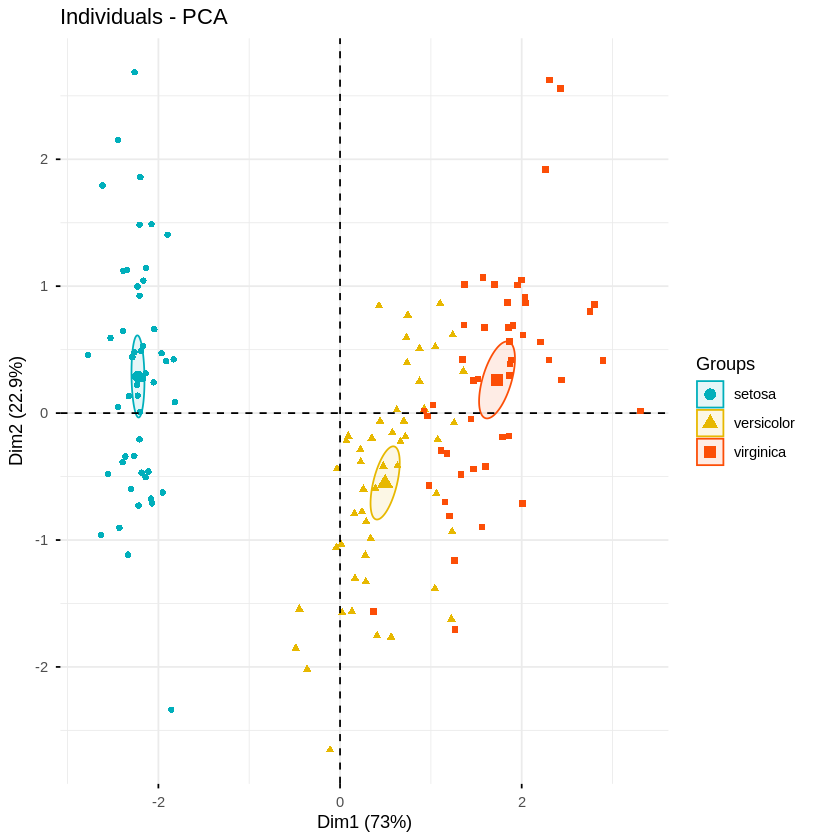

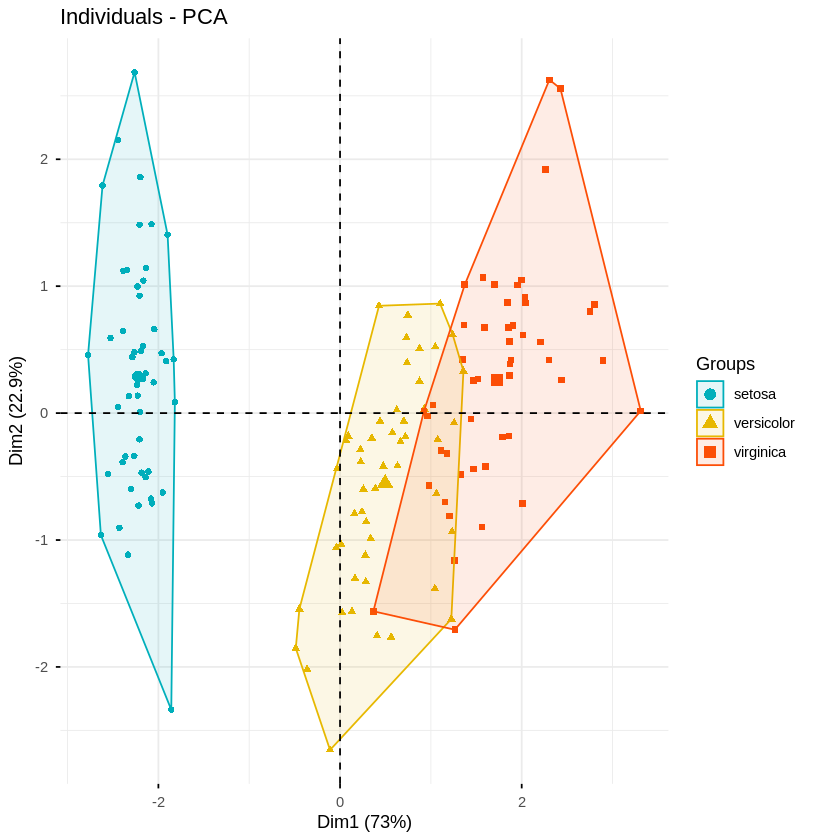

In [47]:
# Add confidence ellipses
fviz_pca_ind(iris.pca, geom.ind = "point",
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )
# Convex hull
fviz_pca_ind(iris.pca, geom.ind = "point",
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "convex",
             legend.title = "Groups"
             )

Ignoring unknown labels:
• colour : "Groups"
• fill : "Groups"
• linetype : "Groups"
• shape : "Groups"


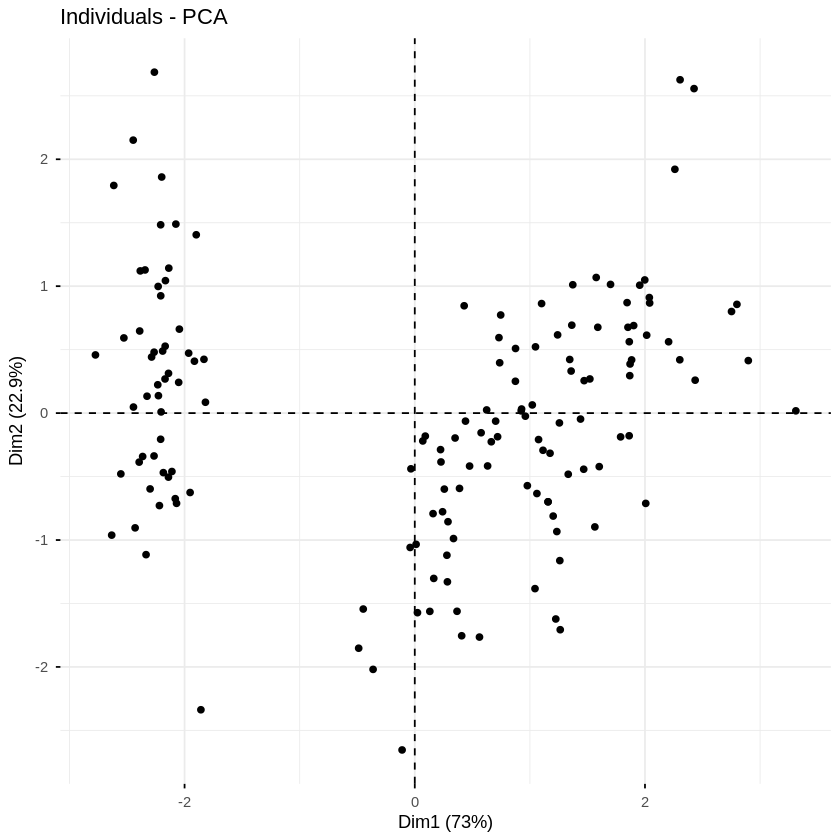

In [48]:
fviz_pca_ind(iris.pca,
             geom.ind = "point", # show points only (but not "text")
             group.ind = iris$Species, # color by groups
             legend.title = "Groups",
             mean.point = FALSE)


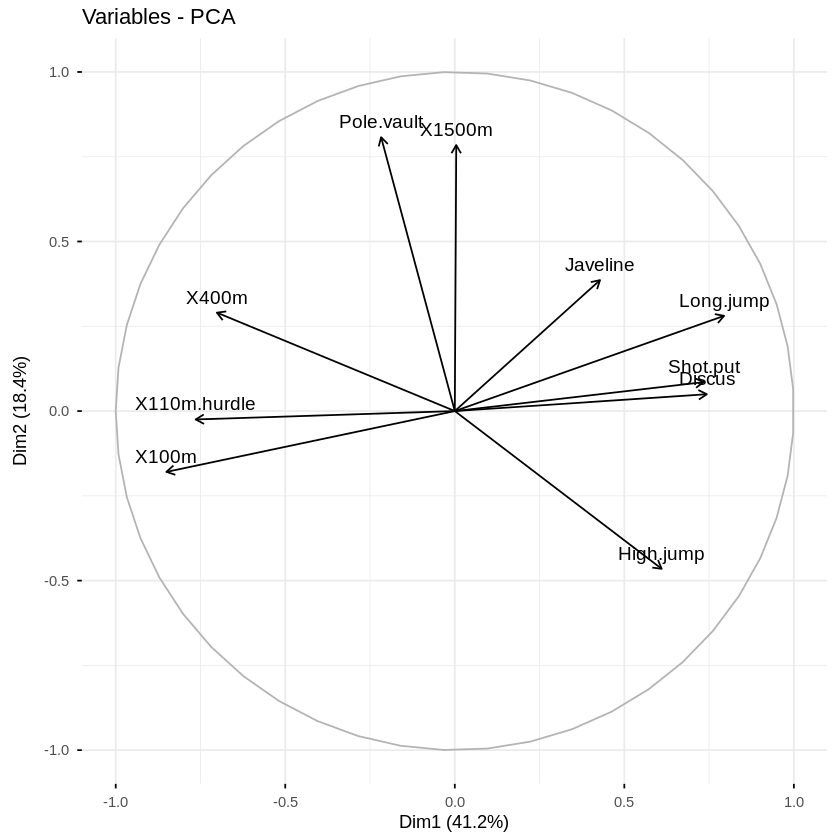

In [49]:
fviz_pca_var(res.pca, axes.linetype = "blank")


Ignoring unknown labels:
• fill : "Species"
• linetype : "Species"


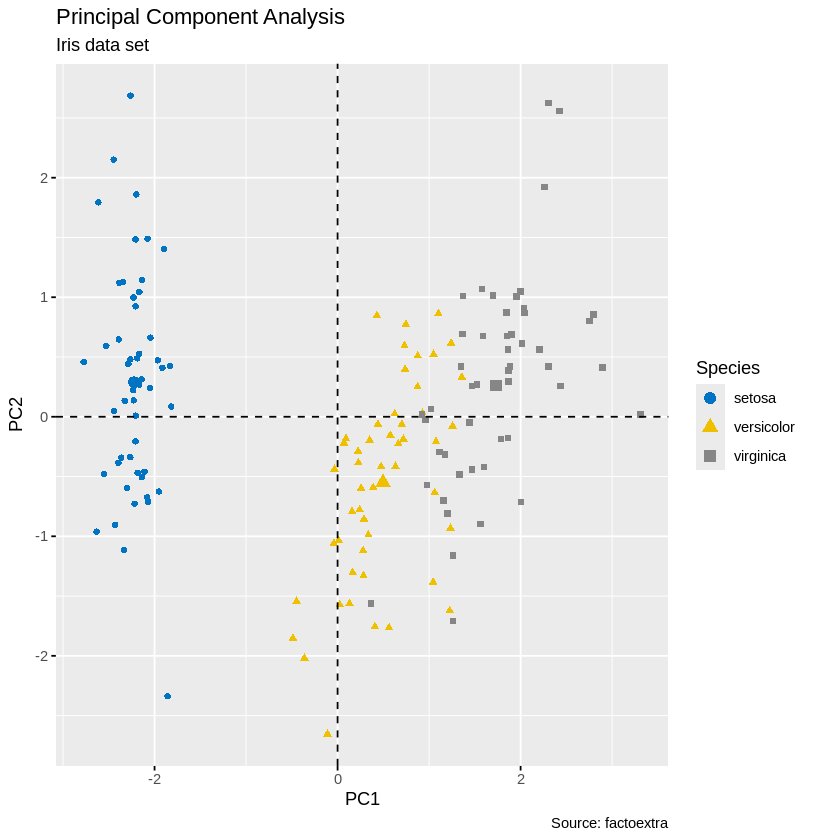

In [50]:
ind.p <- fviz_pca_ind(iris.pca, geom = "point", col.ind = iris$Species)
ggpubr::ggpar(ind.p,
              title = "Principal Component Analysis",
              subtitle = "Iris data set",
              caption = "Source: factoextra",
              xlab = "PC1", ylab = "PC2",
              legend.title = "Species", legend.position = "top",
              ggtheme = theme_gray(), palette = "jco"
              )

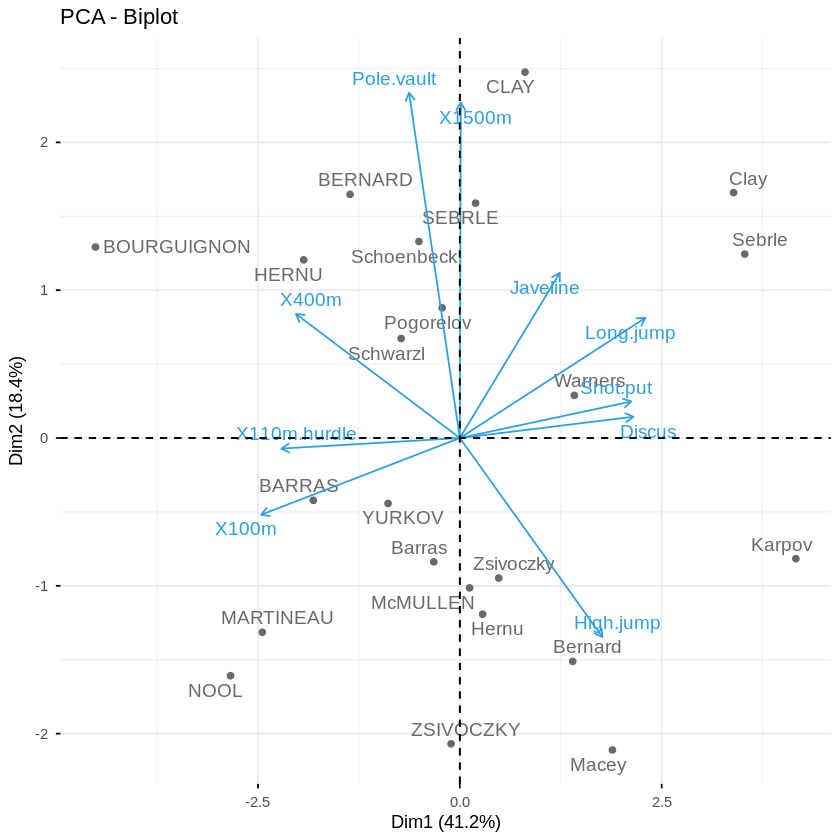

In [51]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

Ignoring unknown labels:
• linetype : "Species"


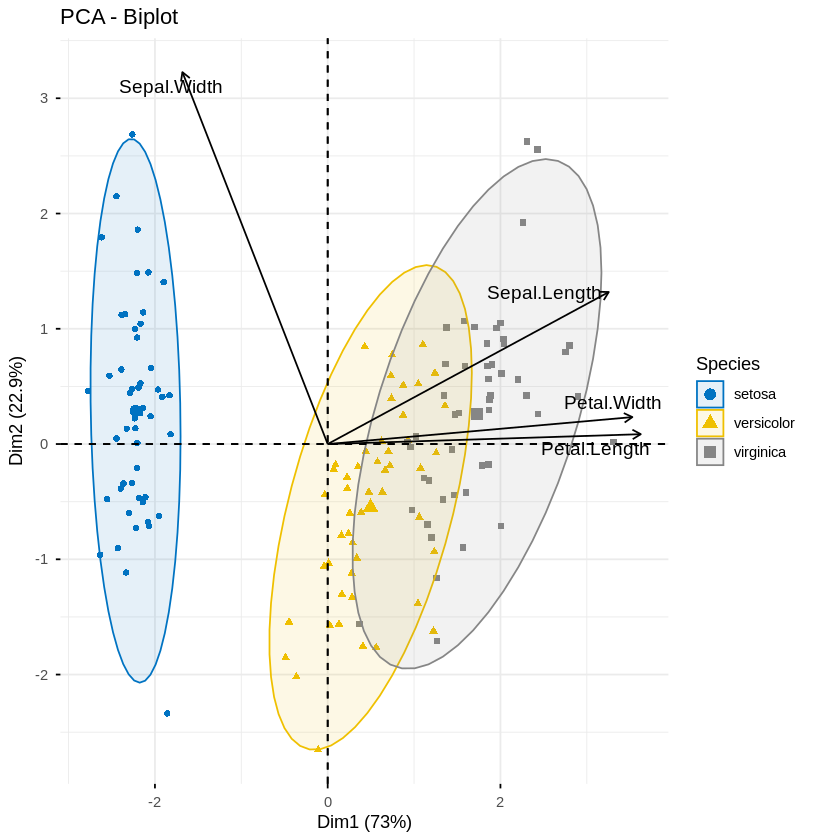

In [52]:
fviz_pca_biplot(iris.pca,
                col.ind = iris$Species, palette = "jco",
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title = "Species")

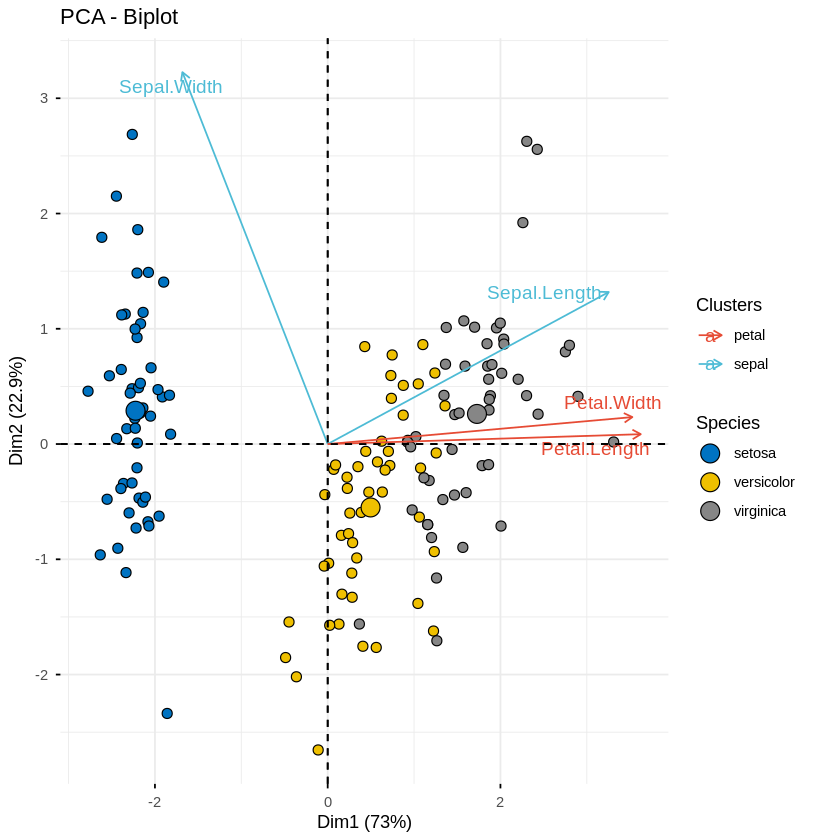

In [53]:
fviz_pca_biplot(iris.pca,
                # Fill individuals by groups
                geom.ind = "point",
                pointshape = 21,
                pointsize = 2.5,
                fill.ind = iris$Species,
                col.ind = "black",
                # Color variable by groups
                col.var = factor(c("sepal", "sepal", "petal", "petal")),

                legend.title = list(fill = "Species", color = "Clusters"),
                repel = TRUE        # Avoid label overplotting
             )+
  ggpubr::fill_palette("jco")+      # Indiviual fill color
  ggpubr::color_palette("npg")      # Variable colors

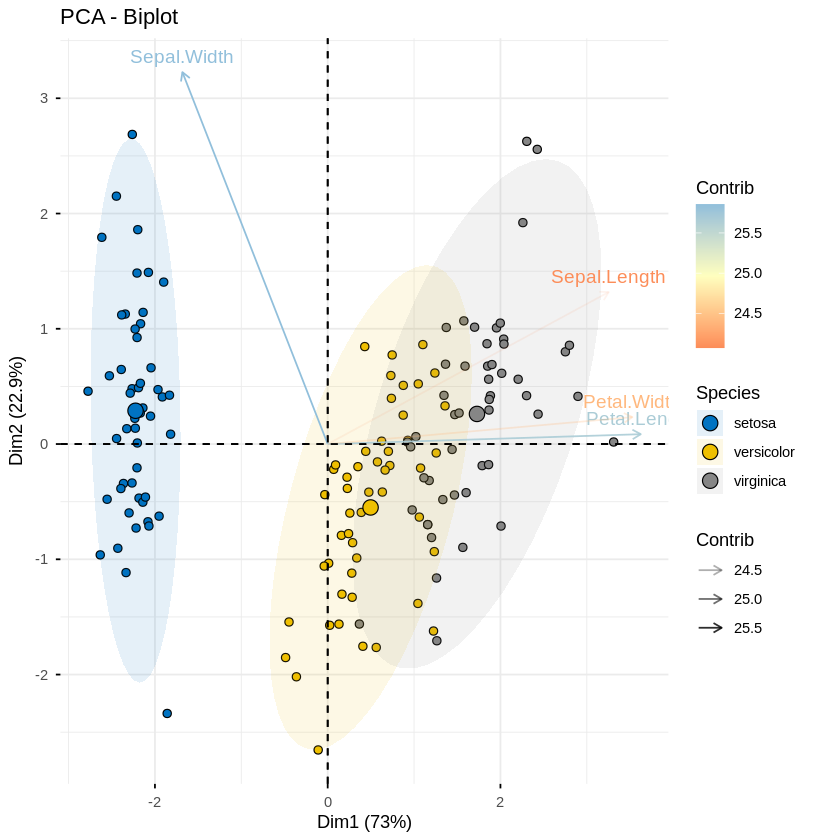

In [54]:
fviz_pca_biplot(iris.pca,
                # Individuals
                geom.ind = "point",
                fill.ind = iris$Species, col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "jco",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", col.var = "contrib",
                gradient.cols = "RdYlBu",

                legend.title = list(fill = "Species", color = "Contrib",
                                    alpha = "Contrib")
                )

In [55]:
PCA(X, ind.sup = NULL,
    quanti.sup = NULL, quali.sup = NULL, graph = TRUE)

ERROR: Error: object 'X' not found


In [56]:
res.pca <- PCA(decathlon2, ind.sup = 24:27,
               quanti.sup = 11:12, quali.sup = 13, graph=FALSE)

In [57]:
res.pca$quanti.sup


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,0.4920710,0.060120310,0.03364635,0.00310827,0.0054503477
Points,0.9287322,0.006034589,0.02497110,0.02763272,0.0009701427


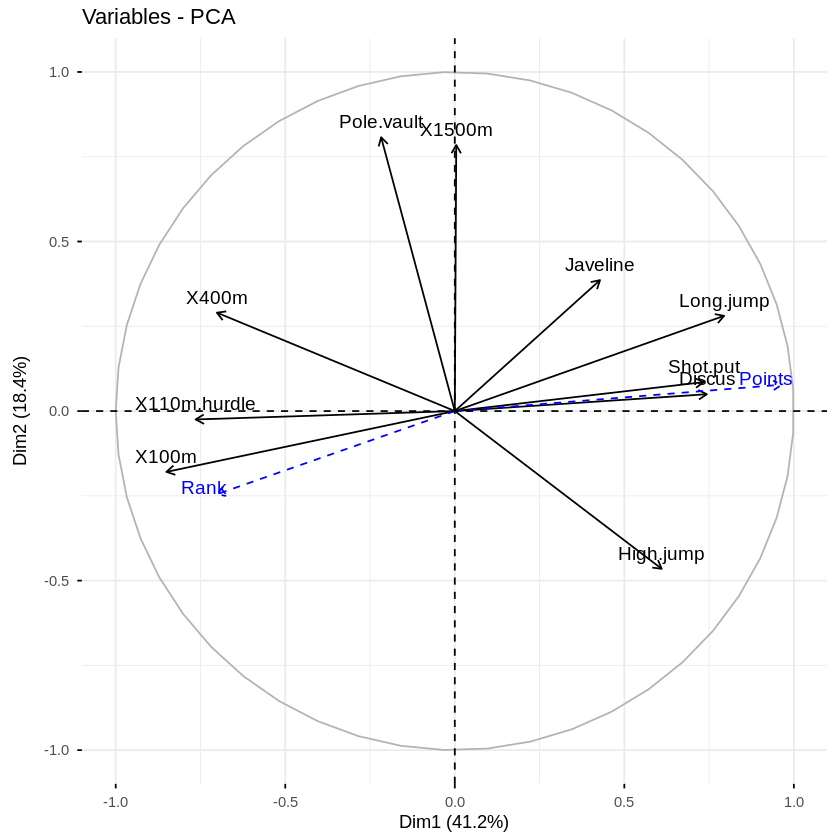

In [58]:
fviz_pca_var(res.pca)


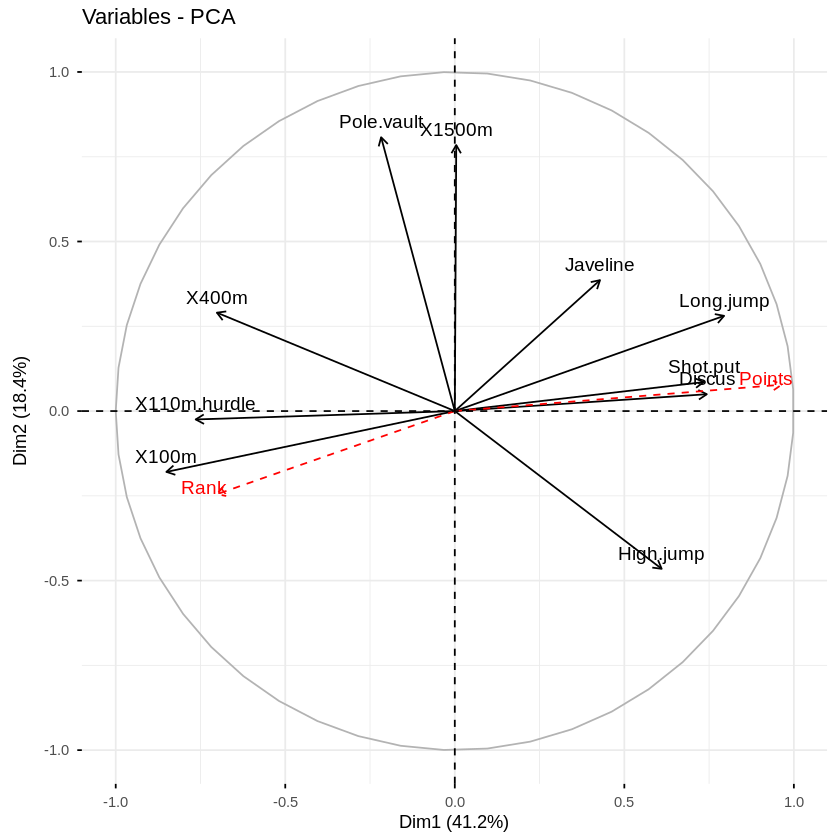

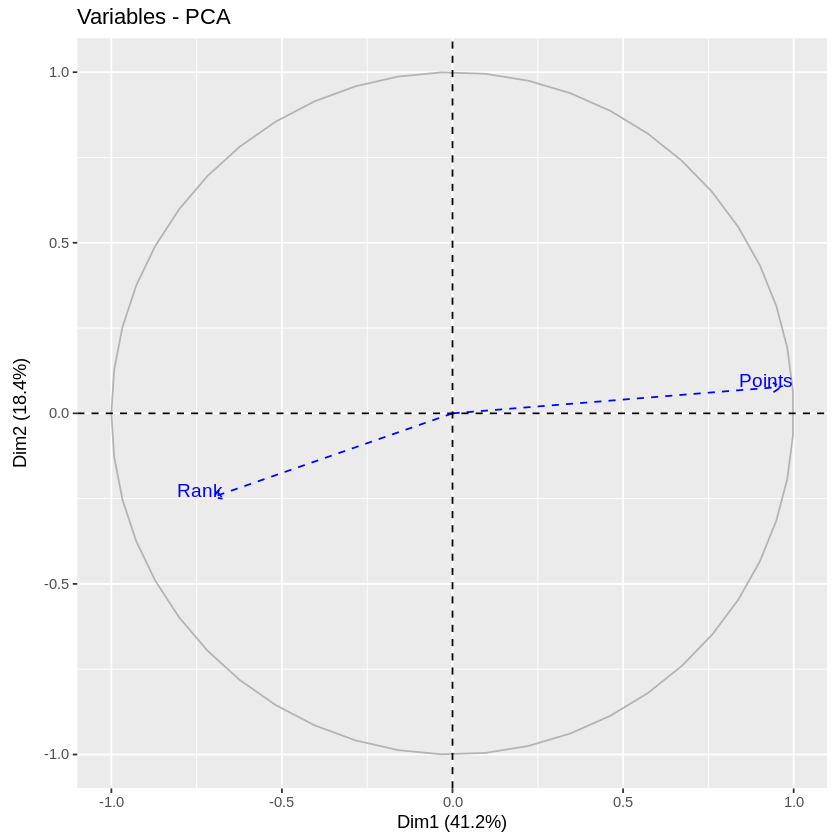

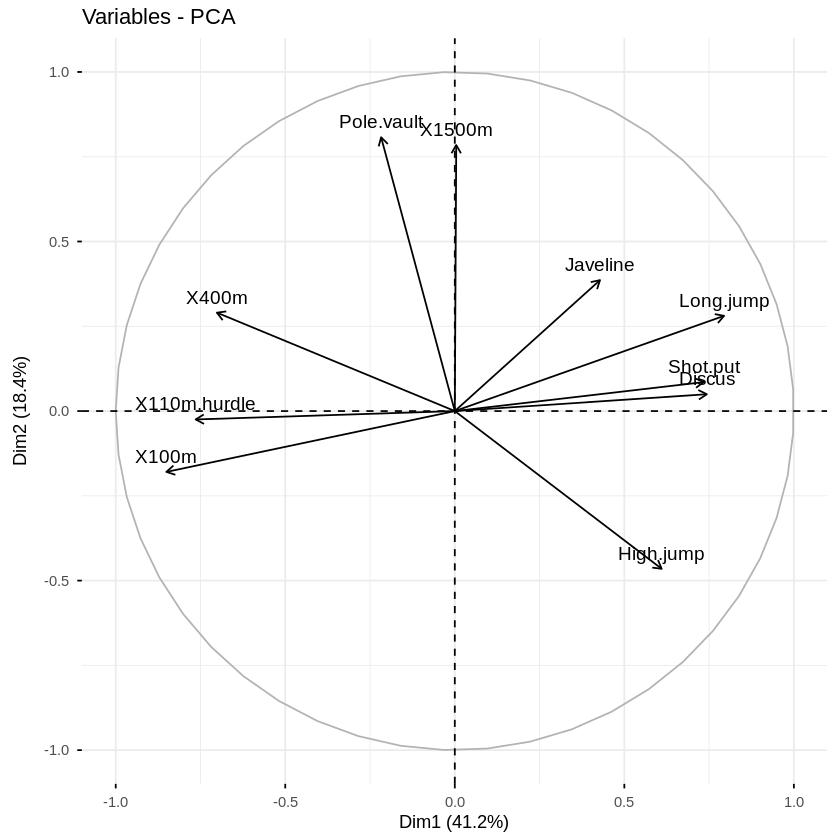

In [59]:
# Change color of variables
fviz_pca_var(res.pca,
             col.var = "black",     # Active variables
             col.quanti.sup = "red" # Suppl. quantitative variables
             )
# Hide active variables on the plot,
# show only supplementary variables
fviz_pca_var(res.pca, invisible = "var")
# Hide supplementary variables
fviz_pca_var(res.pca, invisible = "quanti.sup")

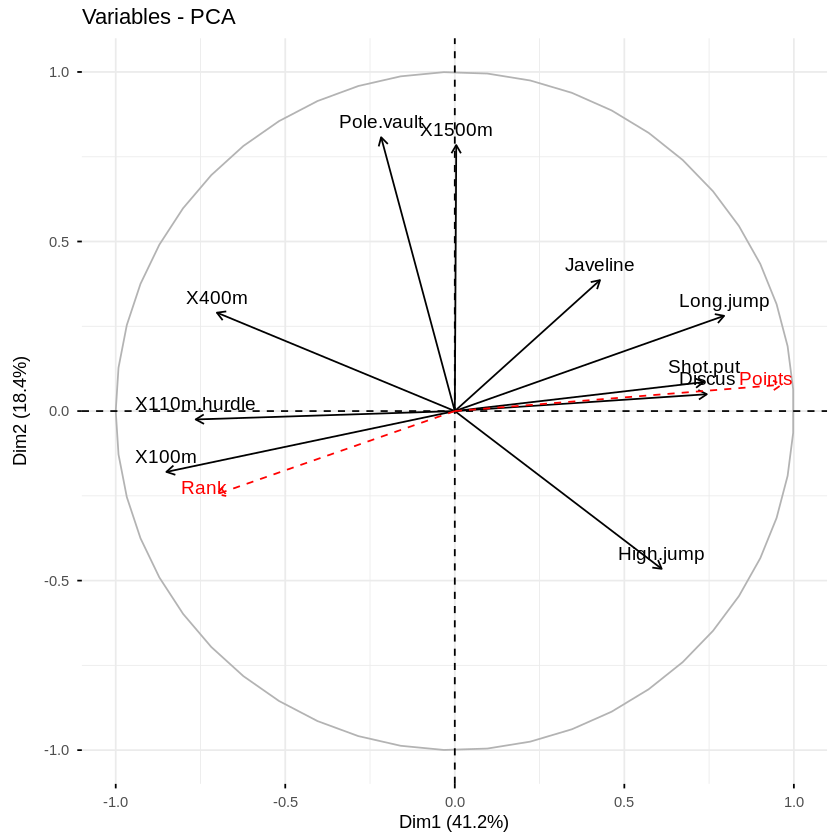

In [60]:
# Plot of active variables
p <- fviz_pca_var(res.pca, invisible = "quanti.sup")
# Add supplementary active variables
fviz_add(p, res.pca$quanti.sup$coord,
         geom = c("arrow", "text"),
         color = "red")

In [61]:
res.pca$ind.sup


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.7947206,0.77951227,-1.6330203,1.7242283,-0.75070396
WARNERS,-0.3864645,-0.12159237,-1.7387332,-0.7063341,-0.03230011
Nool,-0.5591306,1.97748871,-0.4830358,-2.2784526,-0.25461493
Drews,-1.1092038,0.01741477,-3.0488182,-1.5343468,-0.32642192
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.05104677,4.911173e-02,0.21553730,0.24028620,0.0455487744
WARNERS,0.02422707,2.398250e-03,0.49039677,0.08092862,0.0001692349
Nool,0.02897149,3.623868e-01,0.02162236,0.48108780,0.0060077529
Drews,0.09207094,2.269527e-05,0.69560547,0.17617609,0.0079736753


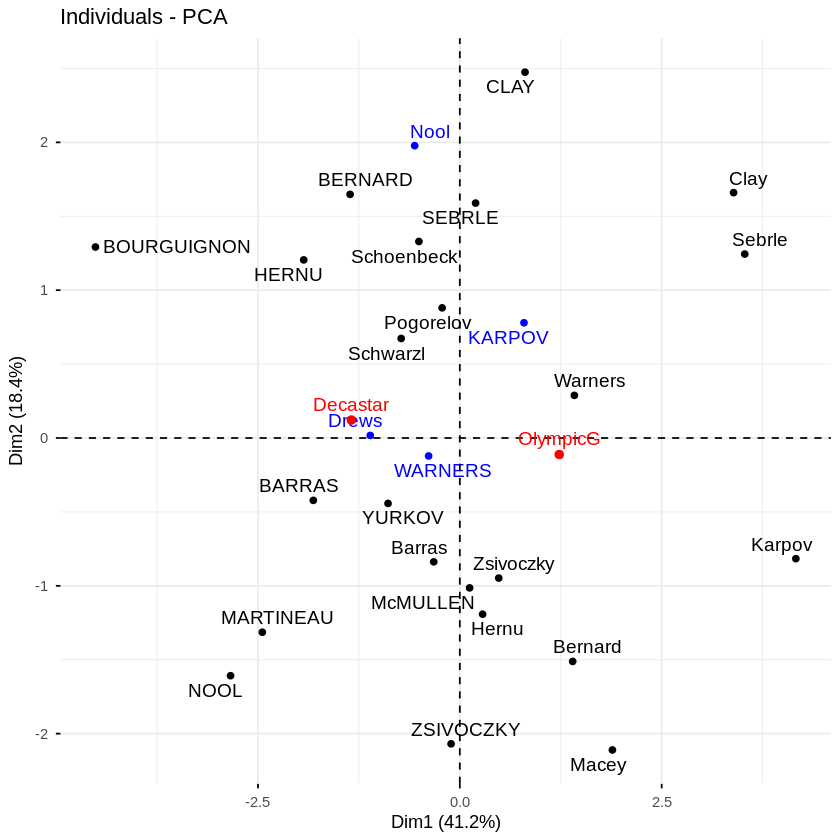

In [62]:
p <- fviz_pca_ind(res.pca, col.ind.sup = "blue", repel = TRUE)
p <- fviz_add(p, res.pca$quali.sup$coord, color = "red")
p

In [63]:
res.pca$quali

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-1.343451,0.1218097,-0.03789524,0.1808357,0.1343364
OlympicG,1.231497,-0.1116589,0.03473730,-0.1657661,-0.1231417
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,0.9051233,0.007440939,0.0007201669,0.01639956,0.009050062
OlympicG,0.9051233,0.007440939,0.0007201669,0.01639956,0.009050062
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-2.970766,0.4034256,-0.1528767,0.8971036,0.7202457
OlympicG,2.970766,-0.4034256,0.1528767,-0.8971036,-0.7202457
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Competition,0.4011568,0.00739783,0.001062332,0.03658159,0.02357972


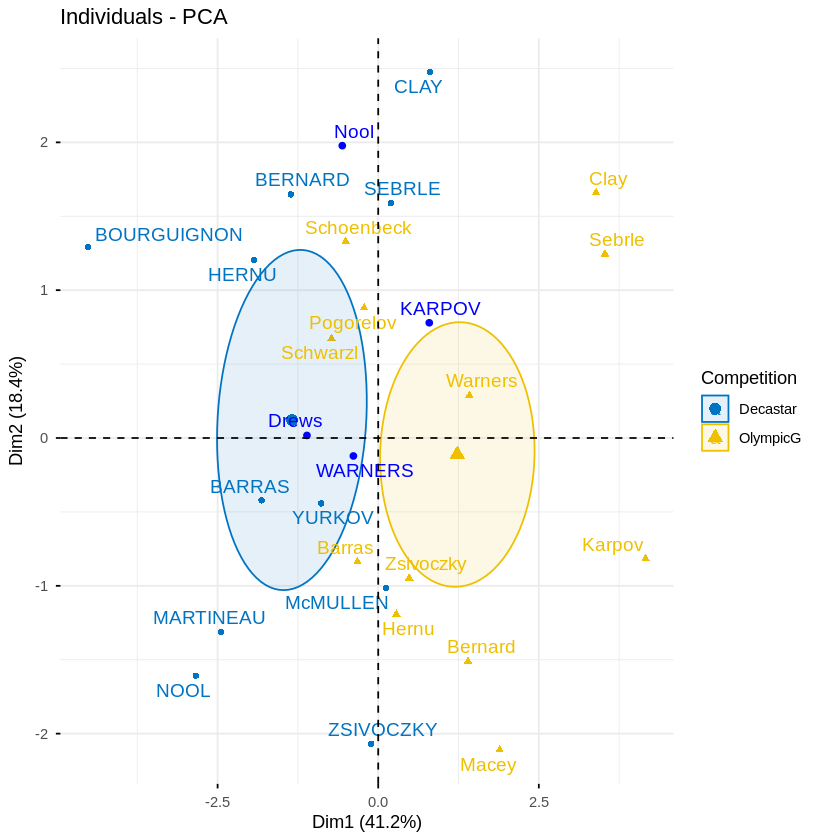

In [64]:
fviz_pca_ind(res.pca, habillage = 13,
             addEllipses =TRUE, ellipse.type = "confidence",
             palette = "jco", repel = TRUE)

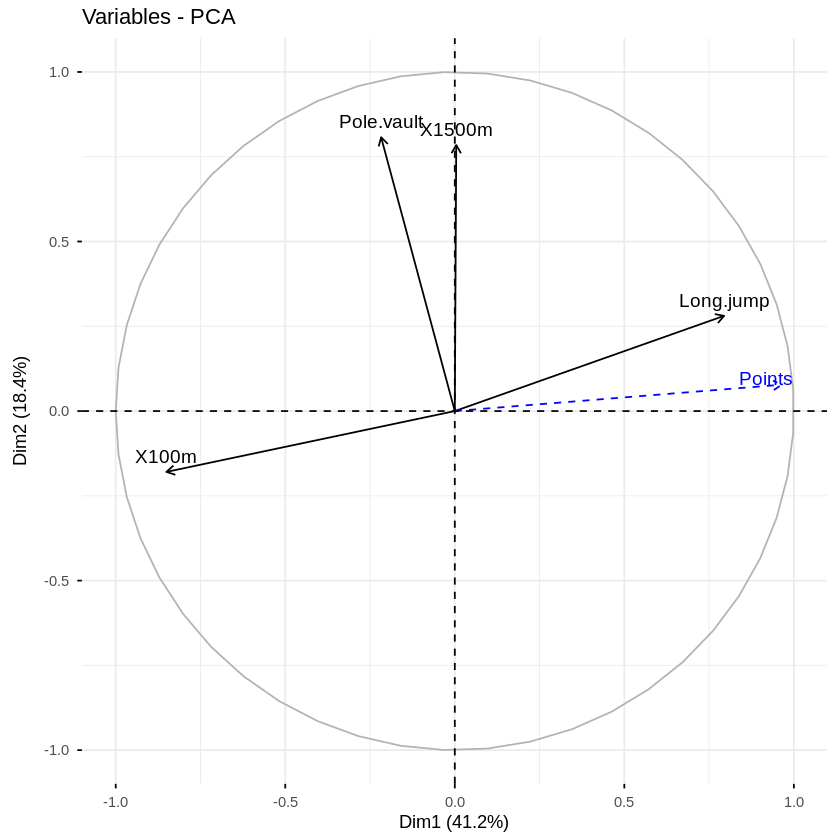

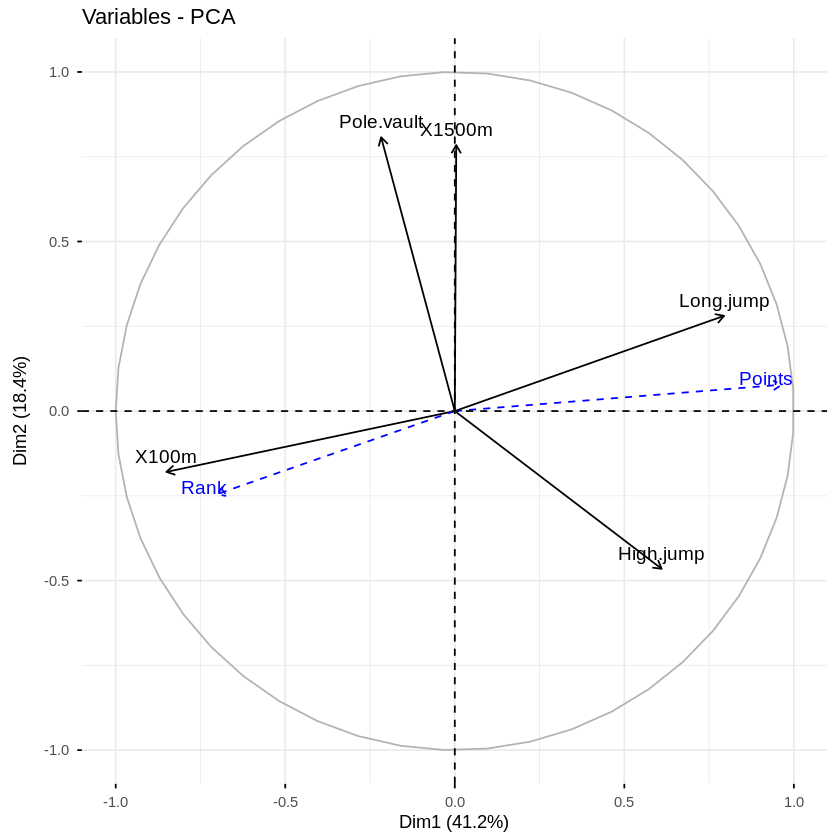

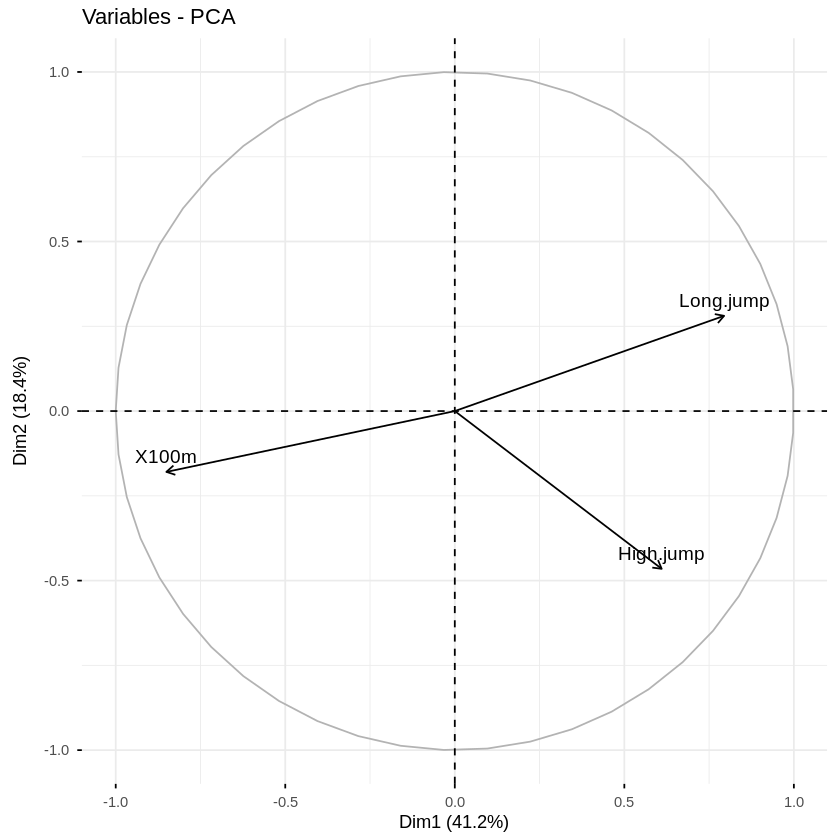

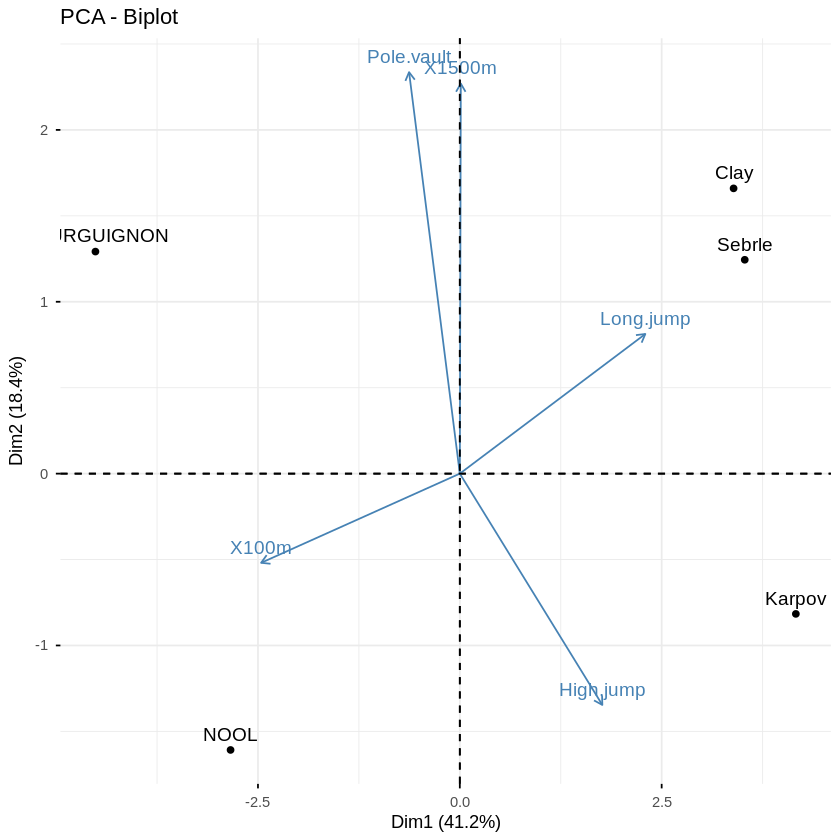

In [65]:
# Visualize variable with cos2 >= 0.6
fviz_pca_var(res.pca, select.var = list(cos2 = 0.6))
# Top 5 active variables with the highest cos2
fviz_pca_var(res.pca, select.var= list(cos2 = 5))
# Select by names
name <- list(name = c("Long.jump", "High.jump", "X100m"))
fviz_pca_var(res.pca, select.var = name)
# top 5 contributing individuals and variable
fviz_pca_biplot(res.pca, select.ind = list(contrib = 5),
               select.var = list(contrib = 5),
               ggtheme = theme_minimal())

In [78]:
# Print the plot to a pdf file
pdf("myplot.pdf")
plot(res.pca)
dev.off()

agg_record_1415446307 
                    2

In [67]:
# Scree plot
scree.plot <- fviz_eig(res.pca)
# Plot of individuals
ind.plot <- fviz_pca_ind(res.pca)
# Plot of variables
var.plot <- fviz_pca_var(res.pca)

Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


In [68]:
pdf("PCA.pdf") # Create a new pdf device
print(scree.plot)
print(ind.plot)
print(var.plot)
dev.off() # Close the pdf device

agg_record_2089115335 
                    2

In [69]:
library(ggpubr)
ggexport(plotlist = list(scree.plot, ind.plot, var.plot),
         filename = "PCA.pdf")

file saved to PCA.pdf



In [70]:
ggexport(plotlist = list(scree.plot, ind.plot, var.plot),
         nrow = 2, ncol = 2,
         filename = "PCA.pdf")

file saved to PCA.pdf



In [71]:
ggexport(plotlist = list(scree.plot, ind.plot, var.plot),
         filename = "PCA.png")

[1] "PCA%03d.png"


file saved to PCA%03d.png



In [72]:
# Export into a TXT file
write.infile(res.pca, "pca.txt", sep = "\t")
# Export into a CSV file
write.infile(res.pca, "pca.csv", sep = ";")

In [73]:
res.pca <- prcomp(iris[, -5], scale. = TRUE)


In [74]:
res.pca <- princomp(iris[, -5], cor = TRUE)


In [75]:
library("ade4")
res.pca <- dudi.pca(iris[, -5], scannf = FALSE, nf = 5)

ERROR: Error in library("ade4"): there is no package called ‘ade4’


In [80]:
install.packages("ExPosition")

library("ExPosition")
res.pca <- epPCA(iris[, -5], graph = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘prettyGraphs’


Loading required package: prettyGraphs



Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


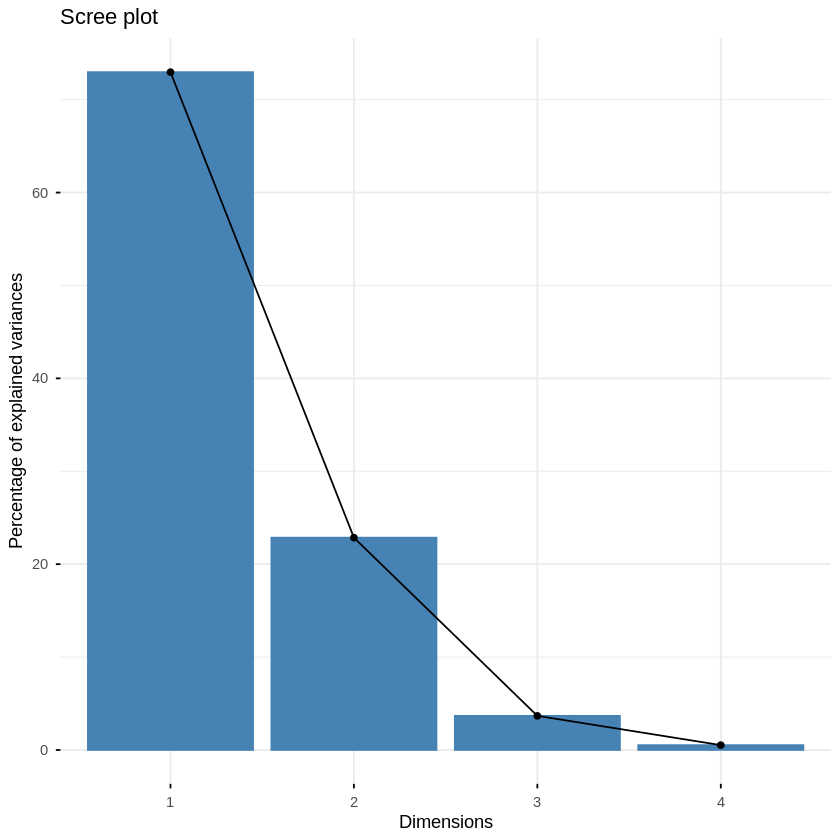

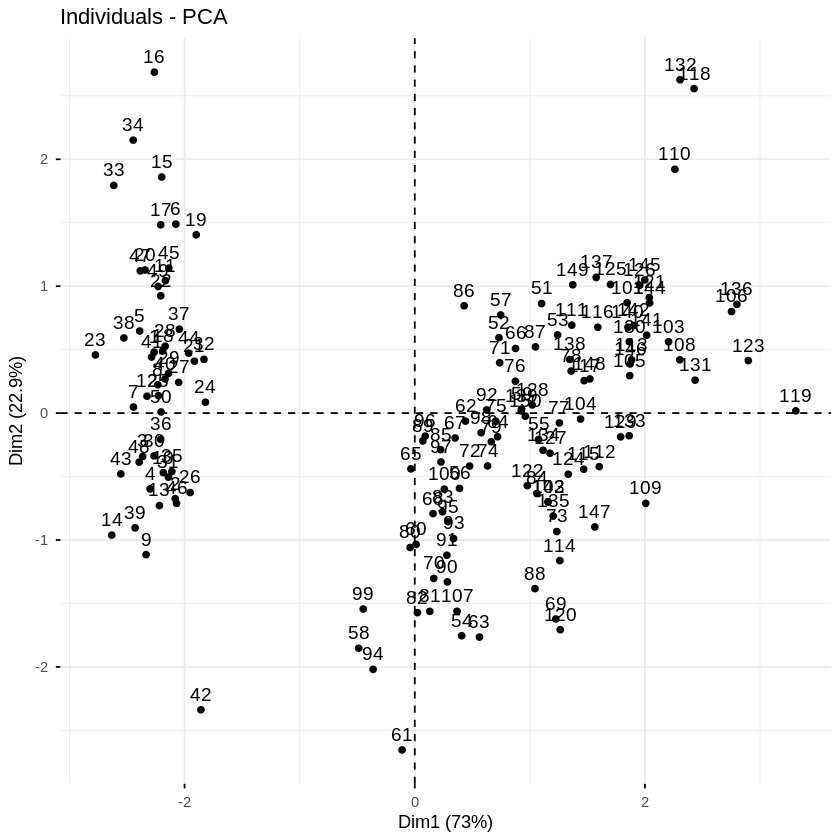

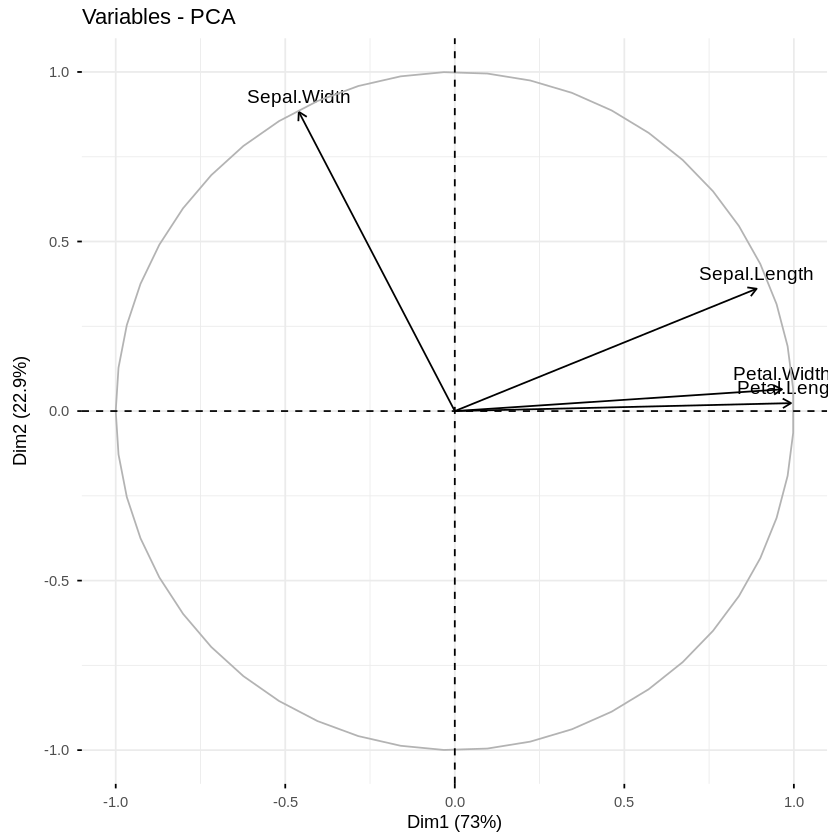

In [77]:
fviz_eig(res.pca)     # Scree plot
fviz_pca_ind(res.pca) # Graph of individuals
fviz_pca_var(res.pca) # Graph of variables